## CS146 - Assignment 2
#### Erkin Polat

In [77]:
import numpy as np
import scipy as sp
import scipy.stats as sts
import matplotlib.pyplot as plt

%matplotlib inline

Size of data set: 5856
First 3 values in data set: [30.   3.4  3.2]
Sum of data set: 1441.6838153800093


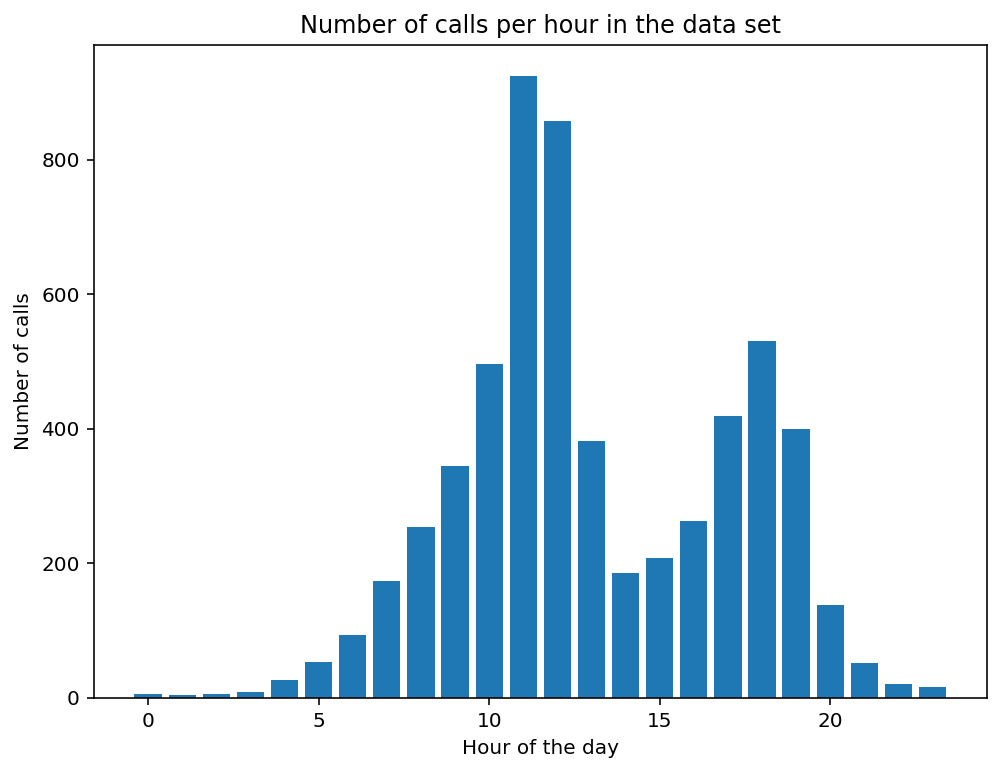

In [78]:
#This first cell is exactly the same code from the class activity.
#Loads and separates data

waiting_times_day = np.loadtxt('call_center.csv')

# Display some basic information about the data set.
print('Size of data set:', len(waiting_times_day))
print('First 3 values in data set:', waiting_times_day[:3])
print('Sum of data set:', sum(waiting_times_day))

# Make 24 empty lists, one per hour.
waiting_times_per_hour = [[] for _ in range(24)]

# Split the data into 24 separate series, one for each hour of the day.
current_time = 0
for t in waiting_times_day:
    current_hour = int(current_time // 60)
    current_time += t
    waiting_times_per_hour[current_hour].append(t)

# Plot the number of calls per hour using a bar chart
plt.figure(figsize=(8, 6))
plt.bar(range(24), [len(w) for w in waiting_times_per_hour])
plt.xlabel('Hour of the day')
plt.ylabel('Number of calls')
plt.title('Number of calls per hour in the data set')
plt.show()

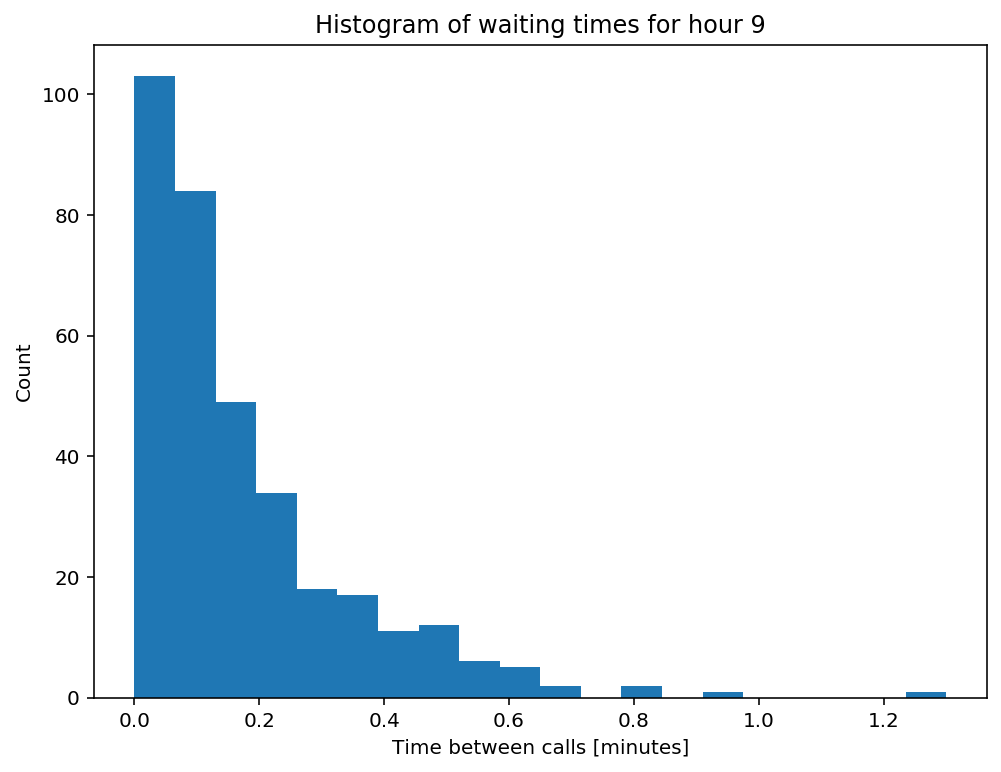

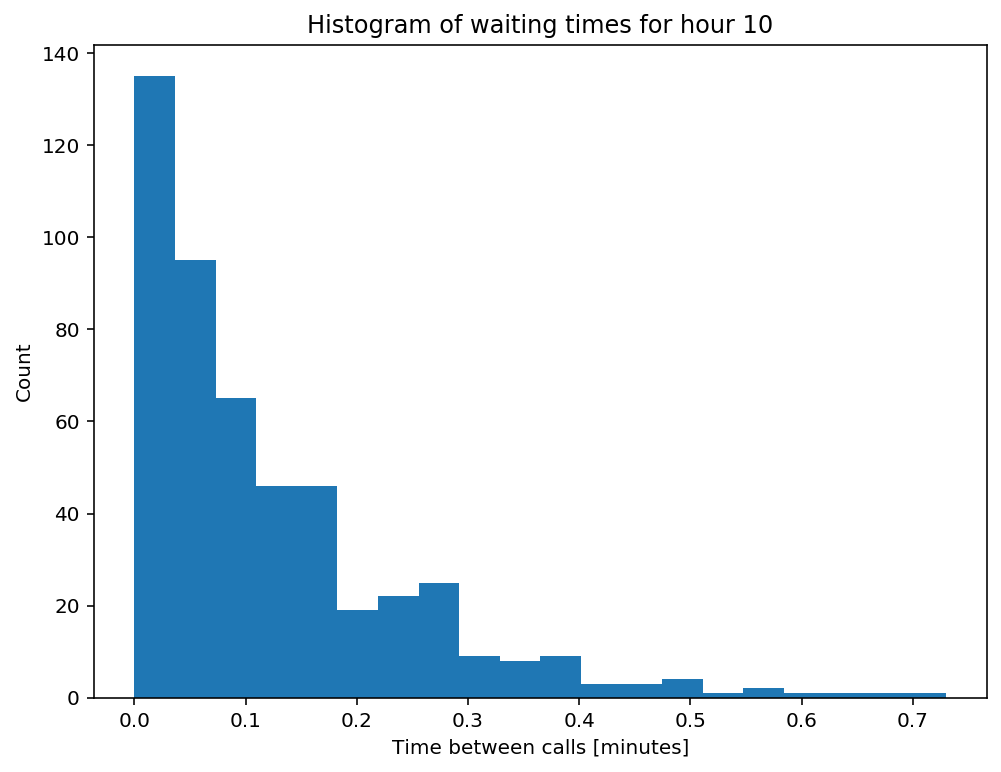

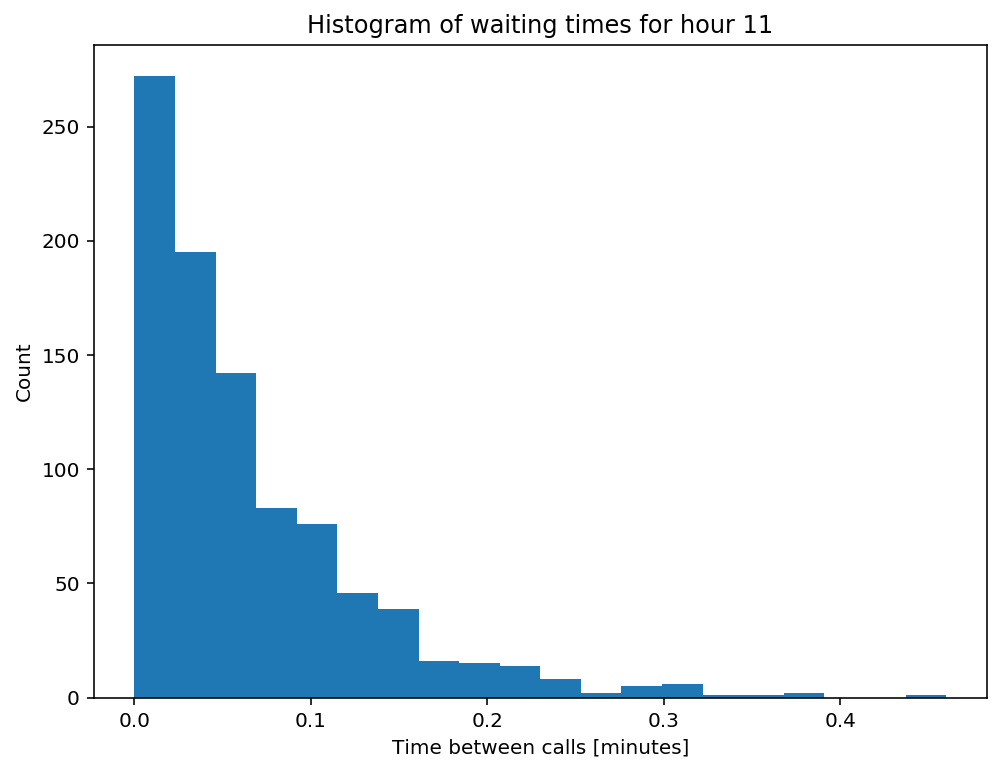

In [88]:
#My code in general uses a slightly modified version of the code shared in the class for it to fit inside for loops


#To save space in the assignment and to make it easier to read and grade, I visualize here only a part of the data, but while preparing the assignment I did these for the whole data range.

hour_index = range(9, 12)
#hour_index = range(24)



for i in hour_index:
    waiting_times_hour = waiting_times_per_hour[i]

    plt.figure(figsize=(8, 6))
    plt.hist(waiting_times_hour, bins=20)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Count')
    plt.title(f'Histogram of waiting times for hour {i}')
    plt.show()

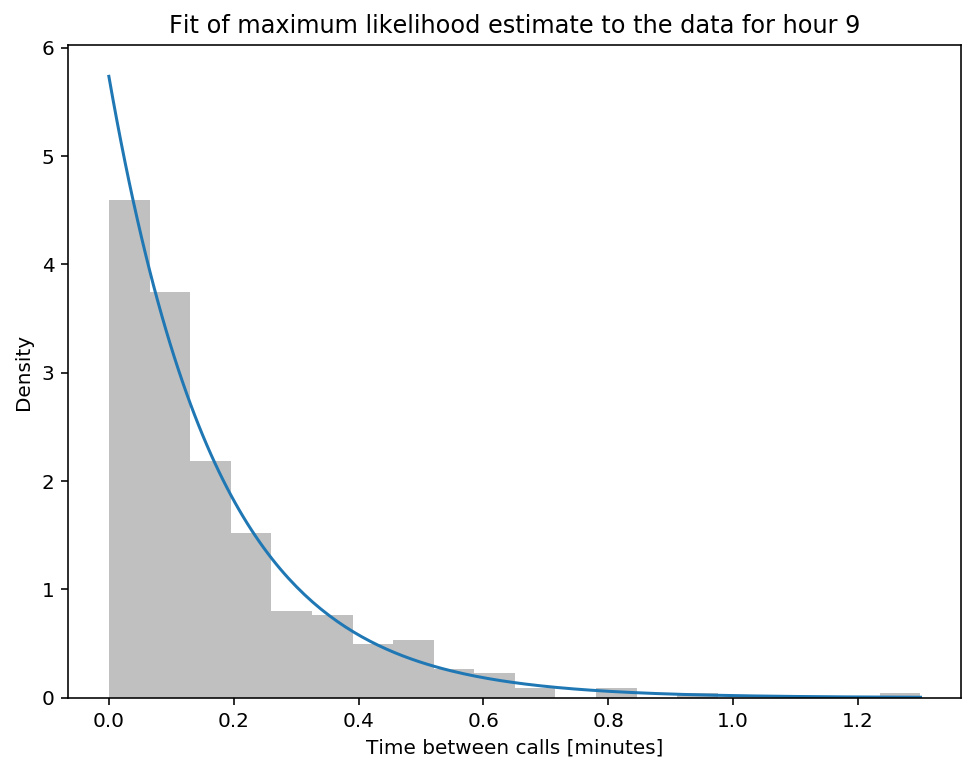

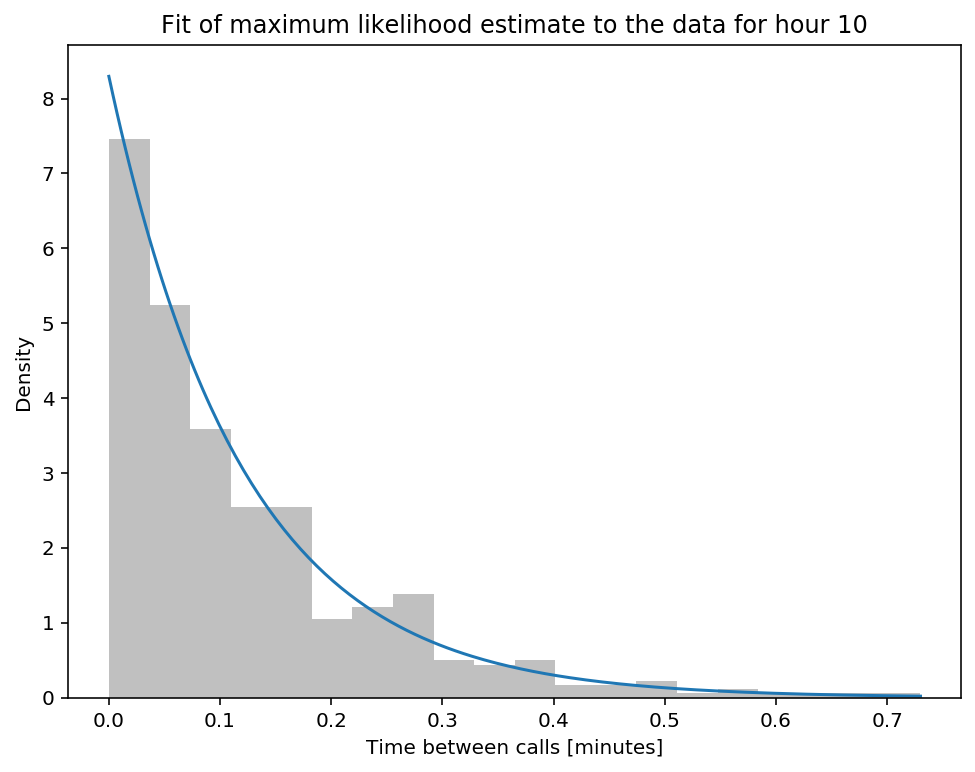

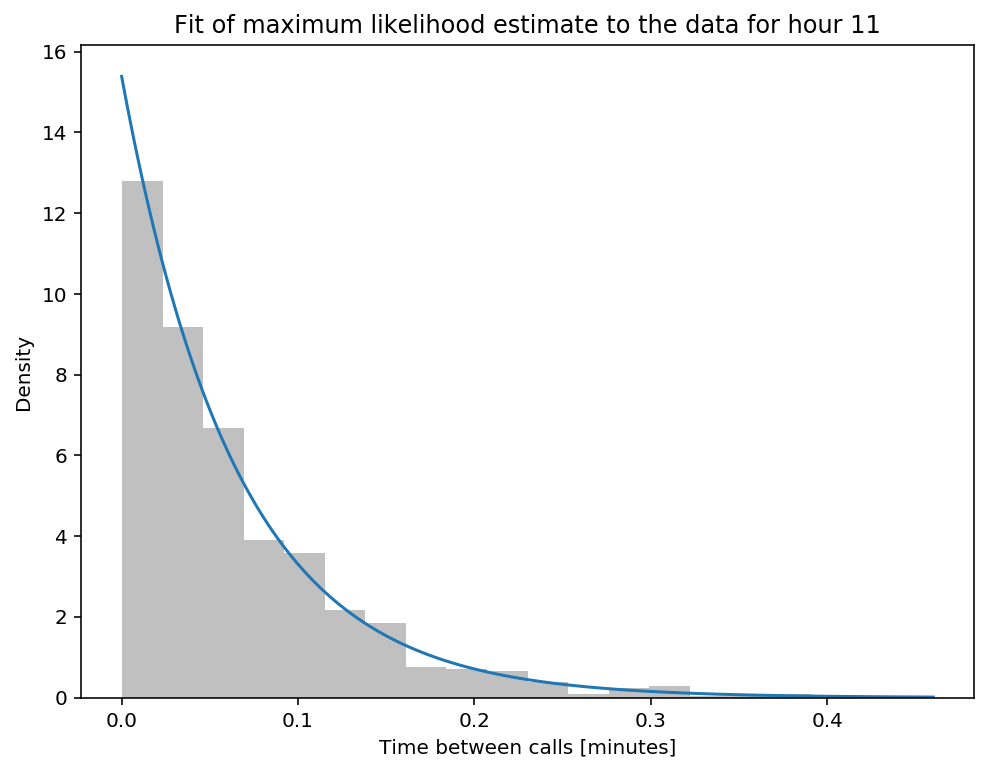

In [80]:
#Plotting the likelihood functions over the data

for i in hour_index:
    waiting_times_hour = waiting_times_per_hour[i]

    lambda_ = 1 / np.mean(waiting_times_hour)
    distribution = sts.expon(scale=1/lambda_)

    plt.figure(figsize=(8, 6))
    plt.hist(waiting_times_hour, bins=20, density=True, color='#c0c0c0')
    x = np.linspace(0, max(waiting_times_hour), 200)
    y = distribution.pdf(x)
    plt.plot(x, y)
    plt.xlabel('Time between calls [minutes]')
    plt.ylabel('Density')
    plt.title(f'Fit of maximum likelihood estimate to the data for hour {i}')
    plt.show()
    
#Even though the exponential distribution fits well with most of the data, at the times where there aren't a lot of data, I observed that the distribution doesn't fit very well over the data. Below I plot for the days with more data. It can be seen the likelihood function fits very well.

In [81]:
#I use the functions shared in the class

# THE LIKELIHOOD FUNCTION
#
# This function takes 2 inputs, namely the parameter (λ) value at which to
# compute the likelihood and a value from the data set. You need to evaluate
# the exponential distribution of the datum given the parameter value.

def likelihood(lambda_, datum):
    return sts.expon(scale=1/lambda_).pdf(datum)

# THE PRIOR DISTRIBUTION
#
# This function takes 1 input, namely the parameter value (λ) at which to
# compute the prior probability density. You need to evaluate the distribution
# Gamma(λ | α, β).

def prior(lambda_):
    return sts.gamma(1, scale=1/0.25).pdf(lambda_)

# THE POSTERIOR DISTRIBUTION
#
# The function below is provided to help make computing the posterior easier. It
# follows the same pattern as in the previous class, where we multiple the prior
# and the likelihood evaluated at various values of the parameter (λ).
#
# You will see the function uses the logarithms of various distributions. This
# is for numerical reasons. When you multiply lots of likelihood values, the
# result can become very large or very small, causing numerical overflow or
# underflow in Python. Taking logarithms avoids this problem.

def compute_posterior(parameter_values, prior, likelihood, data):
    log_prior = np.log(prior(parameter_values))
    print( data)
    plt.plot(data,(likelihood(parameter_values[0], data)))
    log_likelihood = np.array([
        np.sum(np.log(likelihood(param, data)))
        for param in parameter_values])
    unnormalized_log_posterior = log_prior + log_likelihood
    unnormalized_log_posterior -= max(unnormalized_log_posterior)
    unnormalized_posterior = np.exp(unnormalized_log_posterior)
    area = sp.integrate.trapz(unnormalized_posterior, parameter_values)
    posterior = unnormalized_posterior / area
    return posterior

lambdas = np.linspace(0, 17.5, 501)[1:]


#The code below can be used to visualize the prior and posterior distributions for the whole data

'''for i in hour_index:
    waiting_times_hour = waiting_times_per_hour[i]

    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)

    plt.figure(figsize=(8, 6))
    plt.plot(lambdas, prior(lambdas), color='black', linestyle=':', label='prior')
    plt.plot(lambdas, posterior, label='posterior')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {i}')
    plt.legend()
    plt.show()'''

"for i in hour_index:\n    waiting_times_hour = waiting_times_per_hour[i]\n\n    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)\n\n    plt.figure(figsize=(8, 6))\n    plt.plot(lambdas, prior(lambdas), color='black', linestyle=':', label='prior')\n    plt.plot(lambdas, posterior, label='posterior')\n    plt.xlabel('λ [calls per minute]')\n    plt.ylabel('probability density')\n    plt.title(f'Inference results for hour {i}')\n    plt.legend()\n    plt.show()"

In [82]:
#I also use the compute percentile function from the class activity

def compute_percentile(parameter_values, distribution_values, percentile):
    '''
    Compute the parameter value at a particular percentile of the given
    probability distribution values. This function uses the cumulative trapezoid
    integrator in SciPy.

    Inputs:

        parameter_values (array of float) This is the list of parameter values
          at which the probability distribution has been evaluated.

        distribution_values (array of float) This is the list of values of the
          probability density function evaluated at the parameter values above.

        percentile (float) This is the value between 0 and 1 of the percentile
          to compute.

    Returns: (float) The parameter value at the given percentile.
    '''
    cumulative_distribution = sp.integrate.cumtrapz(
        distribution_values, parameter_values)
    percentile_index = np.searchsorted(cumulative_distribution, percentile)
    return lambdas[percentile_index]

[30.0, 3.4, 3.2, 2.3, 22.0]


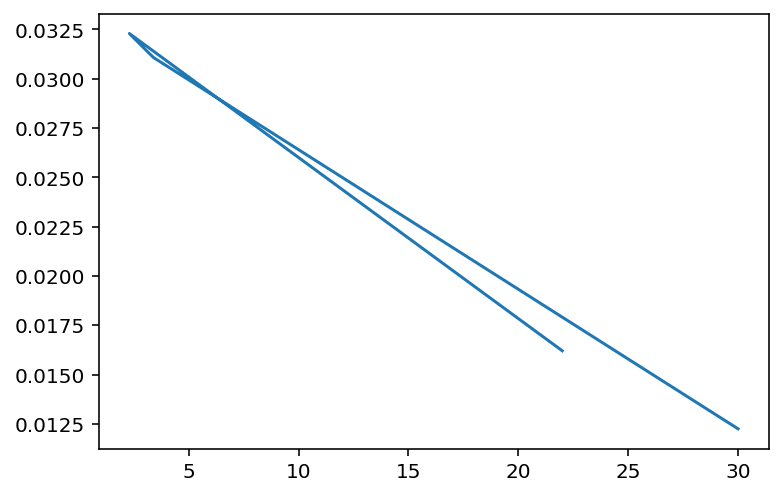

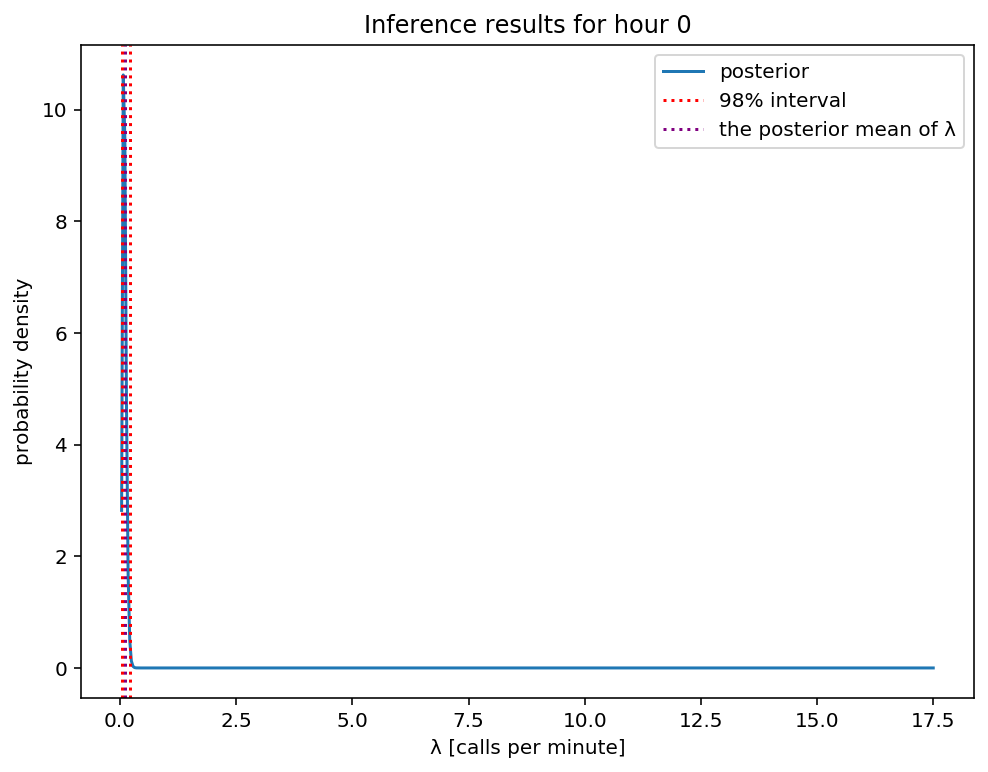

Posterior 98% interval: [0.035, 0.21000000000000002] calls per minute
Expected value: λ = 0.10109349450261348 calls per minute
[24.0, 4.8, 24.0, 14.0]


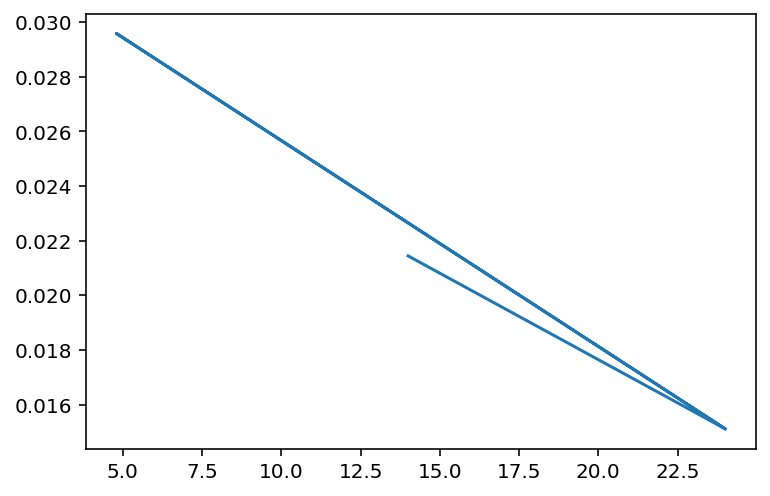

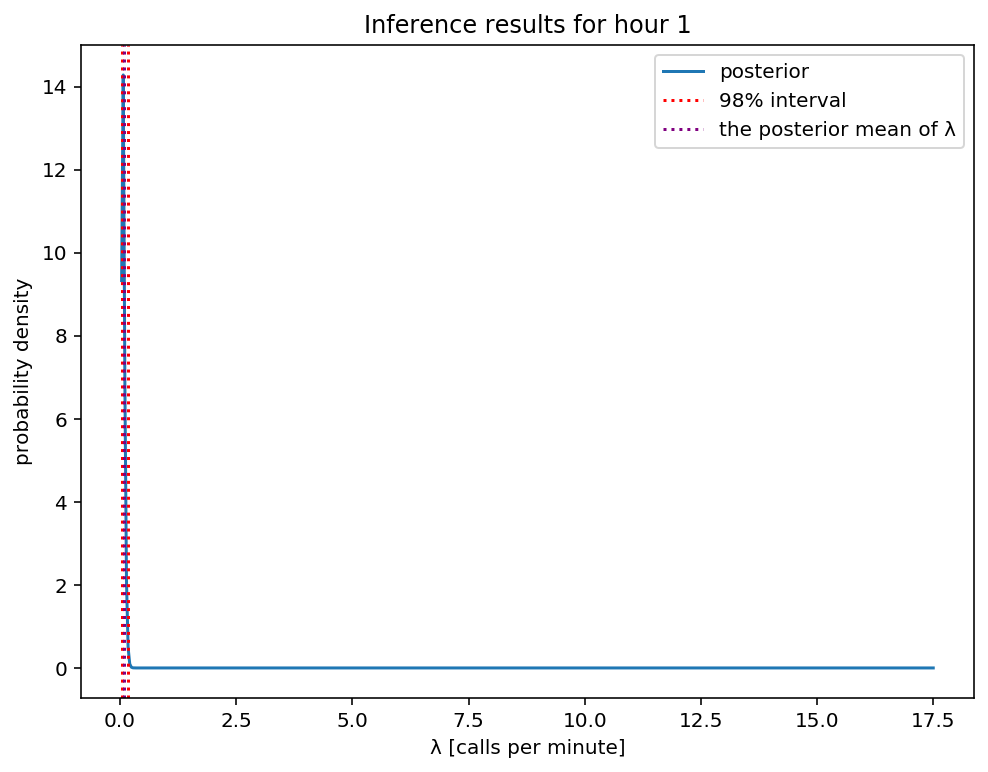

Posterior 98% interval: [0.035, 0.17500000000000002] calls per minute
Expected value: λ = 0.08028981091204002 calls per minute
[1.2, 5.0, 13.0, 7.4, 24.0, 26.0]


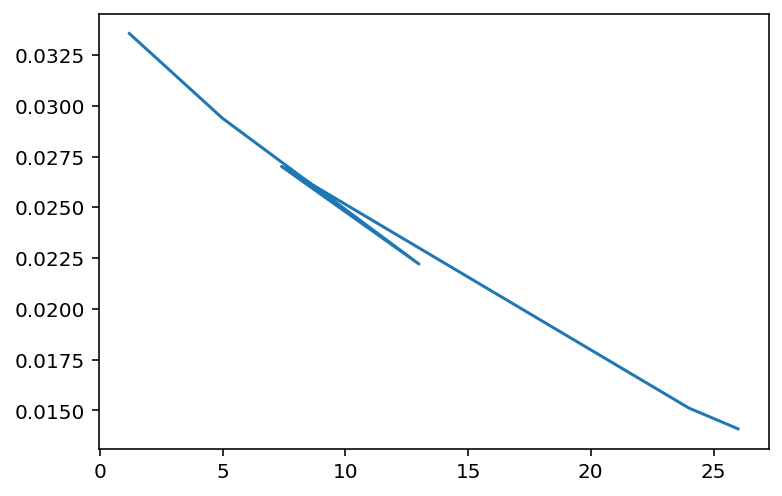

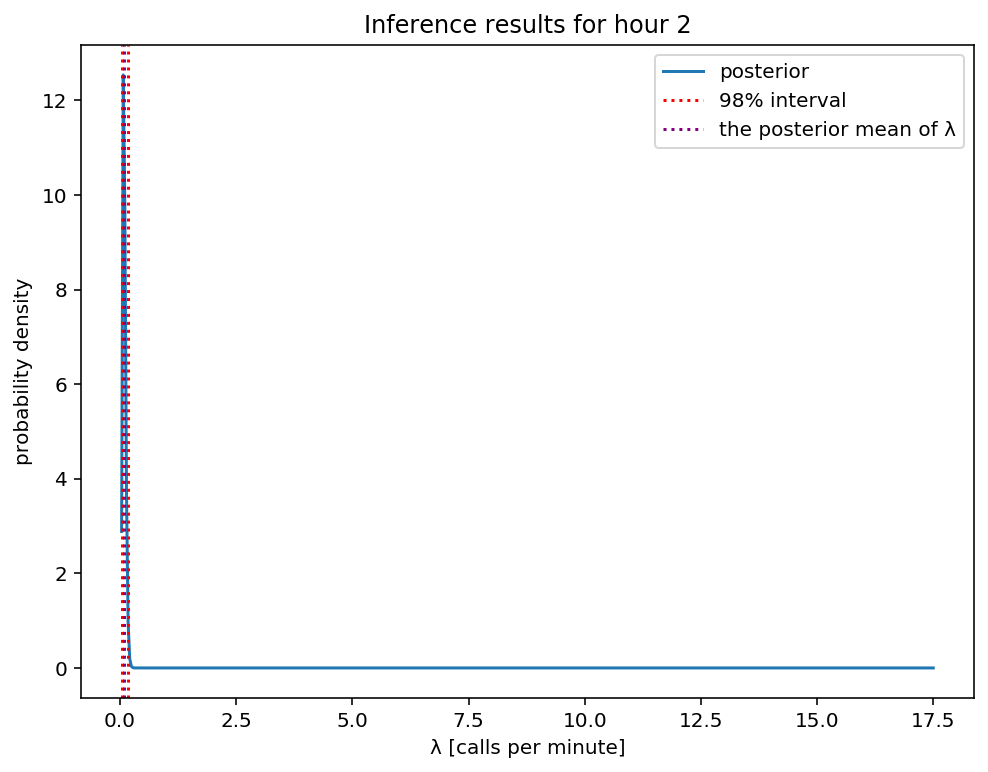

Posterior 98% interval: [0.035, 0.17500000000000002] calls per minute
Expected value: λ = 0.09389806738770683 calls per minute
[5.6, 1.5, 2.4, 4.0, 5.7, 0.44, 16.0, 1.2]


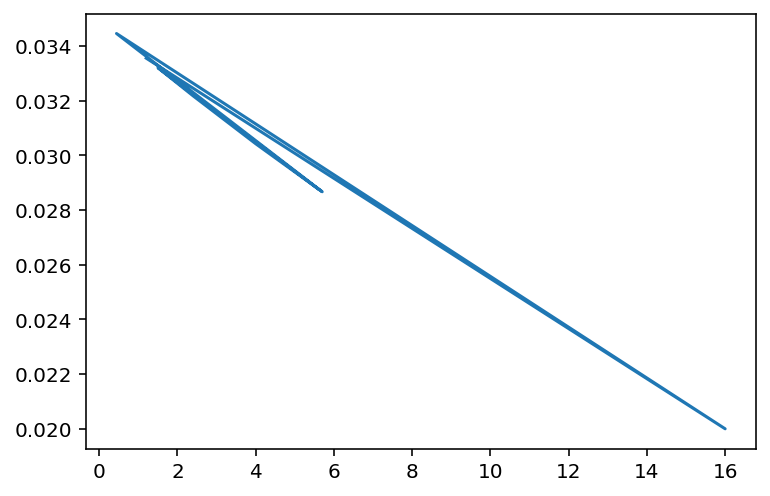

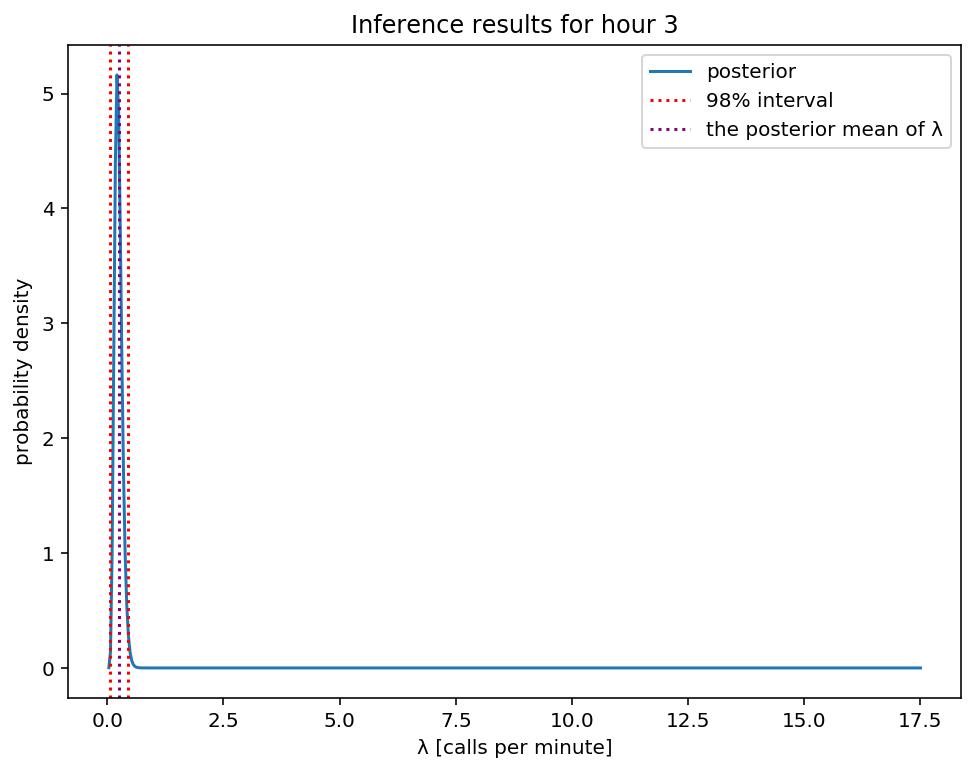

Posterior 98% interval: [0.07, 0.45500000000000007] calls per minute
Expected value: λ = 0.24266012558656802 calls per minute
[2.0, 1.6, 3.5, 2.5, 0.85, 3.9, 3.9, 0.94, 0.94, 1.5, 1.8, 3.3, 0.89, 0.34, 2.8, 0.59, 2.1, 0.32, 6.1, 1.8, 0.32, 3.6, 4.8, 7.7, 0.3, 2.4]


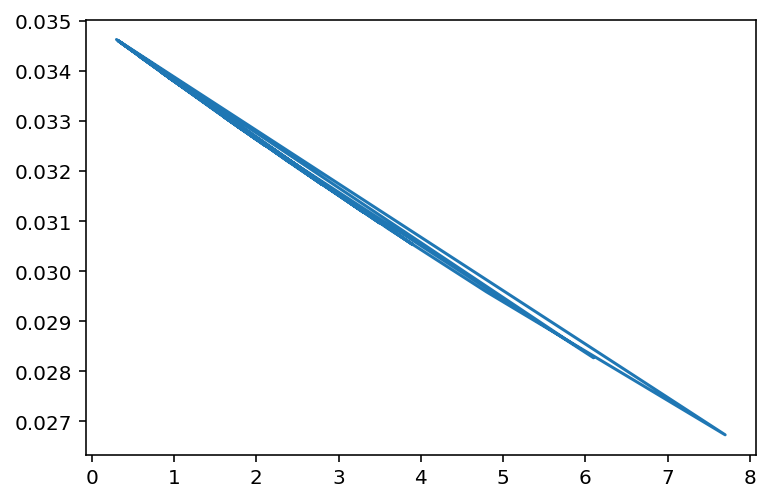

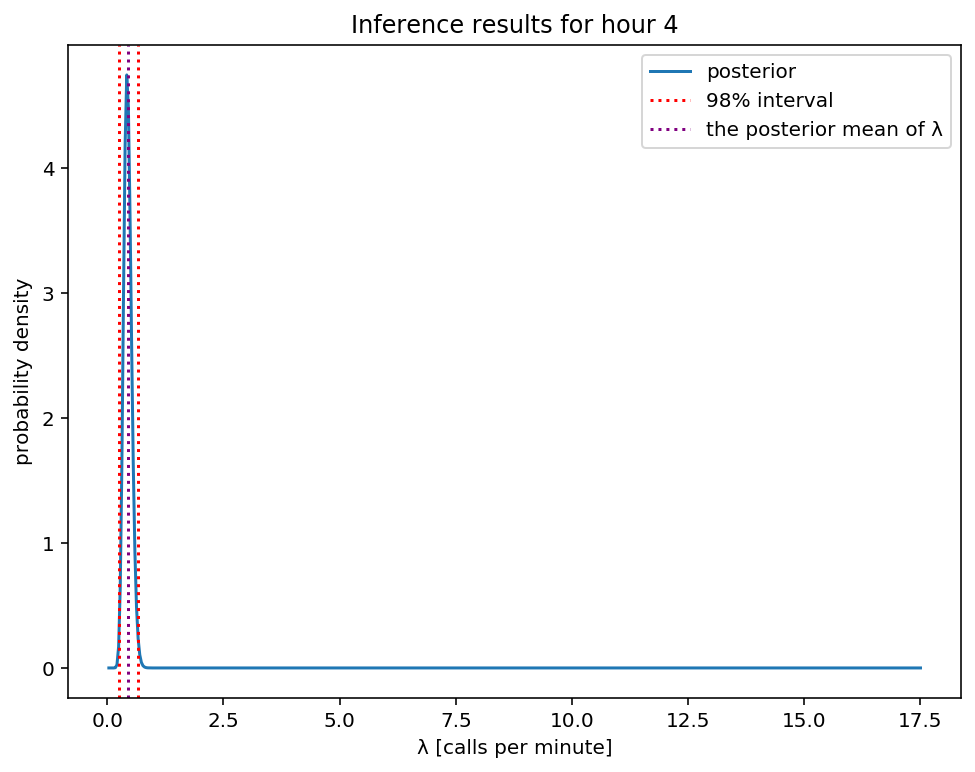

Posterior 98% interval: [0.24500000000000002, 0.665] calls per minute
Expected value: λ = 0.4423328964613473 calls per minute
[0.12, 1.1, 2.2, 0.11, 2.2, 0.2, 2.1, 1.1, 0.44, 0.17, 0.065, 0.26, 1.2, 1.7, 1.8, 0.49, 0.069, 0.45, 0.3, 0.3, 0.84, 1.6, 0.9, 1.2, 6.1, 0.48, 1.4, 0.32, 0.42, 0.48, 0.14, 3.3, 1.6, 2.4, 0.62, 0.37, 0.87, 1.5, 2.4, 2.6, 4.3, 1.0, 0.37, 0.17, 1.1, 1.4, 0.44, 0.17, 0.99, 0.056, 0.12, 1.7, 1.8]


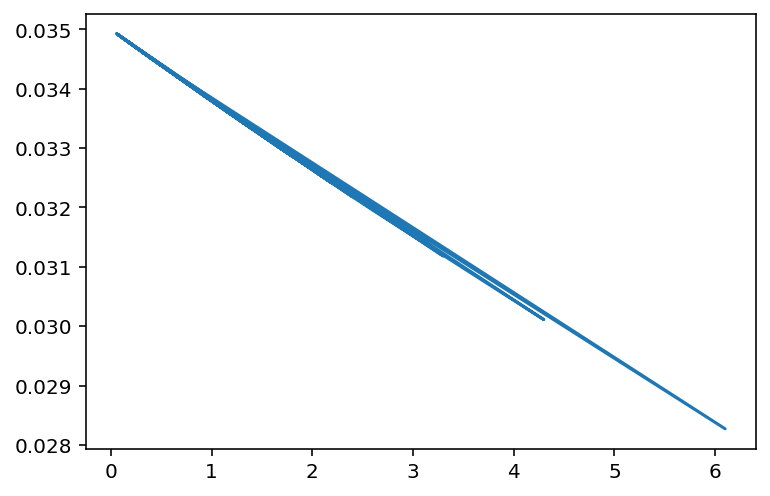

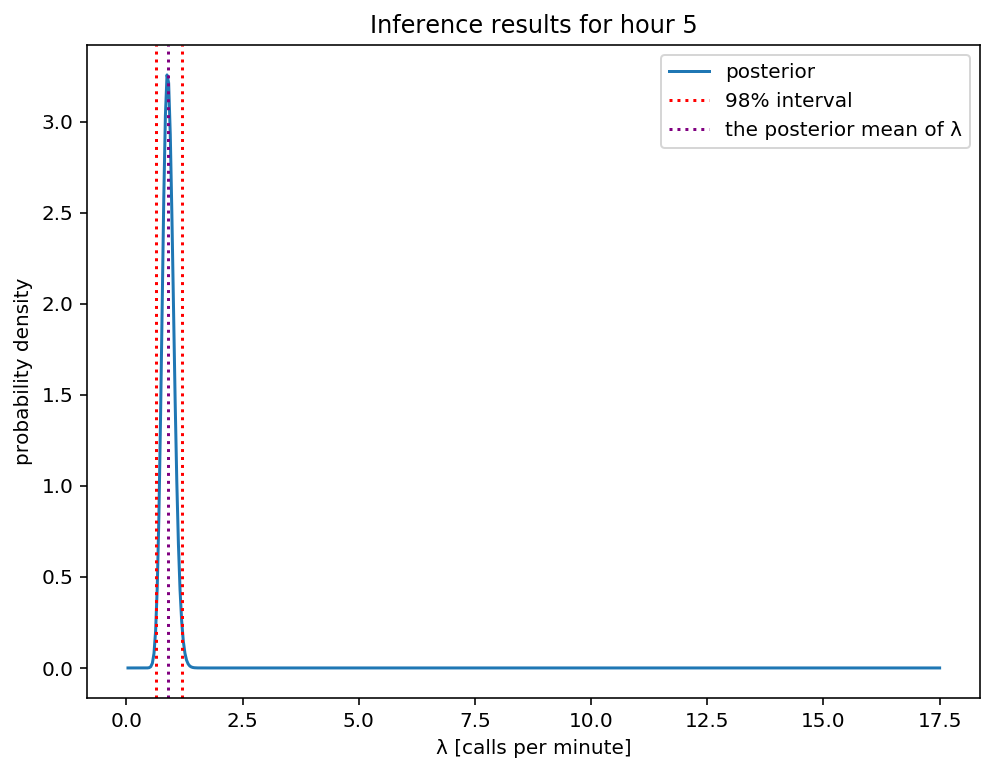

Posterior 98% interval: [0.6300000000000001, 1.1900000000000002] calls per minute
Expected value: λ = 0.9033121445299432 calls per minute
[0.61, 0.1, 0.81, 1.7, 0.3, 1.9, 2.2, 0.29, 0.18, 0.037, 0.51, 0.4, 0.7, 0.18, 1.3, 0.16, 3.6, 0.064, 1.0, 1.1, 0.96, 0.24, 0.93, 0.39, 0.44, 0.18, 1.4, 1.4, 1.3, 0.16, 0.77, 0.15, 0.49, 0.86, 0.13, 1.0, 0.069, 0.5, 0.002, 0.23, 0.14, 0.39, 0.39, 0.76, 0.34, 0.69, 1.3, 0.85, 1.2, 0.021, 0.41, 0.48, 0.16, 0.85, 0.0051, 0.79, 1.1, 0.17, 0.38, 7.4e-05, 0.46, 0.097, 0.24, 0.068, 0.52, 0.24, 0.94, 0.32, 0.3, 0.79, 0.41, 1.2, 0.49, 0.62, 0.28, 0.68, 0.075, 0.35, 0.85, 0.25, 0.97, 0.0098, 0.81, 0.69, 0.11, 0.32, 1.1, 0.0074, 0.39, 0.17, 1.6, 1.5, 2.8]


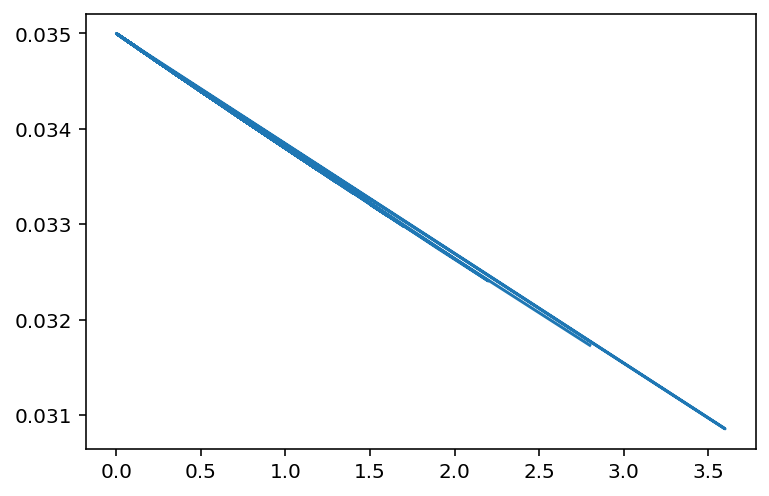

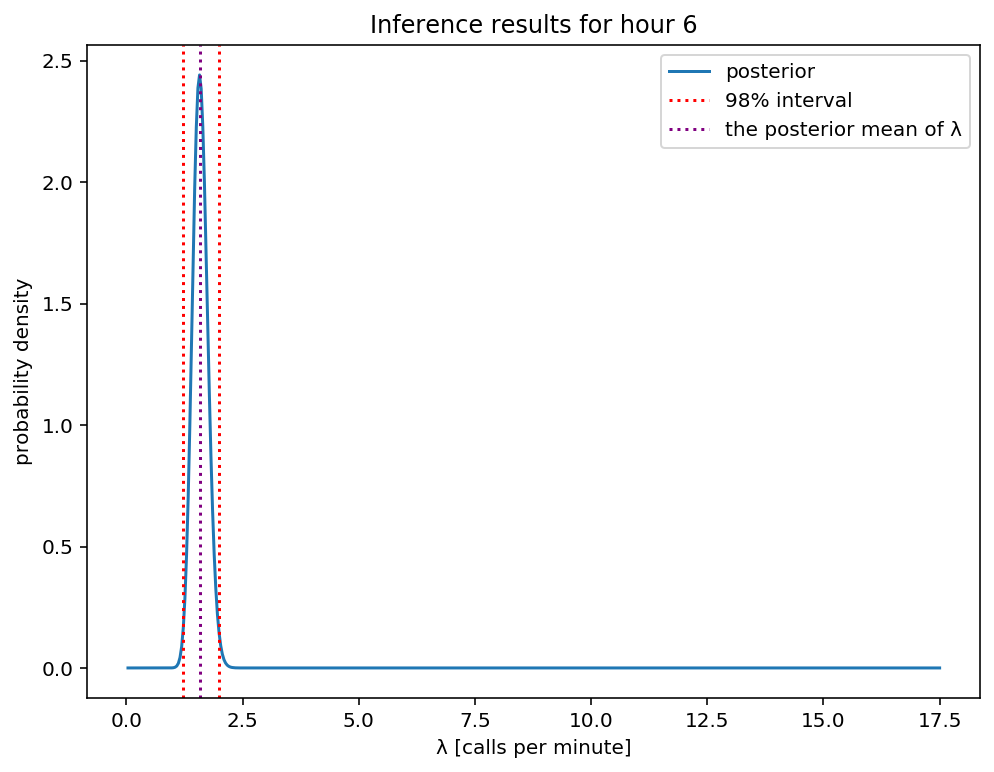

Posterior 98% interval: [1.225, 1.995] calls per minute
Expected value: λ = 1.5911875564257962 calls per minute
[0.094, 0.11, 0.23, 0.23, 0.38, 0.043, 0.87, 0.21, 0.15, 0.014, 0.19, 0.25, 0.11, 0.58, 0.73, 0.021, 0.4, 0.31, 0.39, 1.3, 0.23, 0.27, 0.088, 1.4, 0.22, 0.31, 0.91, 0.48, 0.14, 0.1, 0.53, 0.5, 0.44, 0.22, 0.31, 0.25, 0.47, 0.087, 0.26, 0.27, 0.28, 0.1, 0.71, 0.092, 0.14, 0.33, 0.14, 0.17, 1.3, 0.087, 0.037, 0.00075, 0.1, 0.21, 0.16, 0.48, 0.11, 0.54, 0.036, 0.088, 0.45, 0.38, 0.67, 1.1, 0.23, 0.017, 1.2, 0.79, 0.79, 0.061, 0.26, 0.26, 0.62, 0.38, 0.13, 0.43, 0.29, 0.58, 0.83, 0.63, 1.1, 0.64, 0.31, 0.73, 0.21, 0.037, 0.19, 0.37, 0.062, 0.32, 0.032, 0.76, 1.1, 0.44, 0.27, 1.6, 0.65, 0.78, 0.038, 0.037, 0.091, 0.38, 0.53, 0.56, 0.18, 0.092, 0.55, 0.07, 0.094, 0.76, 0.22, 0.43, 0.24, 0.011, 0.32, 0.39, 0.42, 0.28, 0.76, 0.14, 0.22, 1.3, 0.22, 0.6, 0.22, 1.2, 0.31, 0.035, 0.25, 0.21, 0.22, 0.11, 0.17, 0.06, 0.63, 0.1, 0.33, 0.2, 0.03, 0.16, 0.039, 0.051, 0.034, 0.35, 0.12, 0.31, 

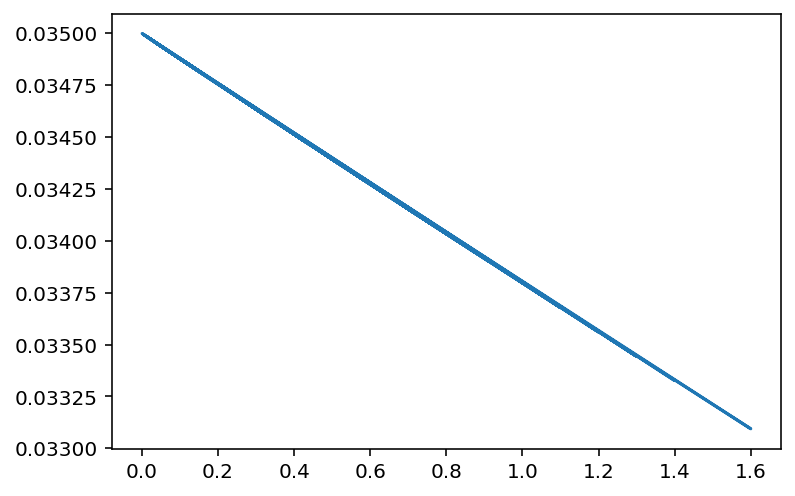

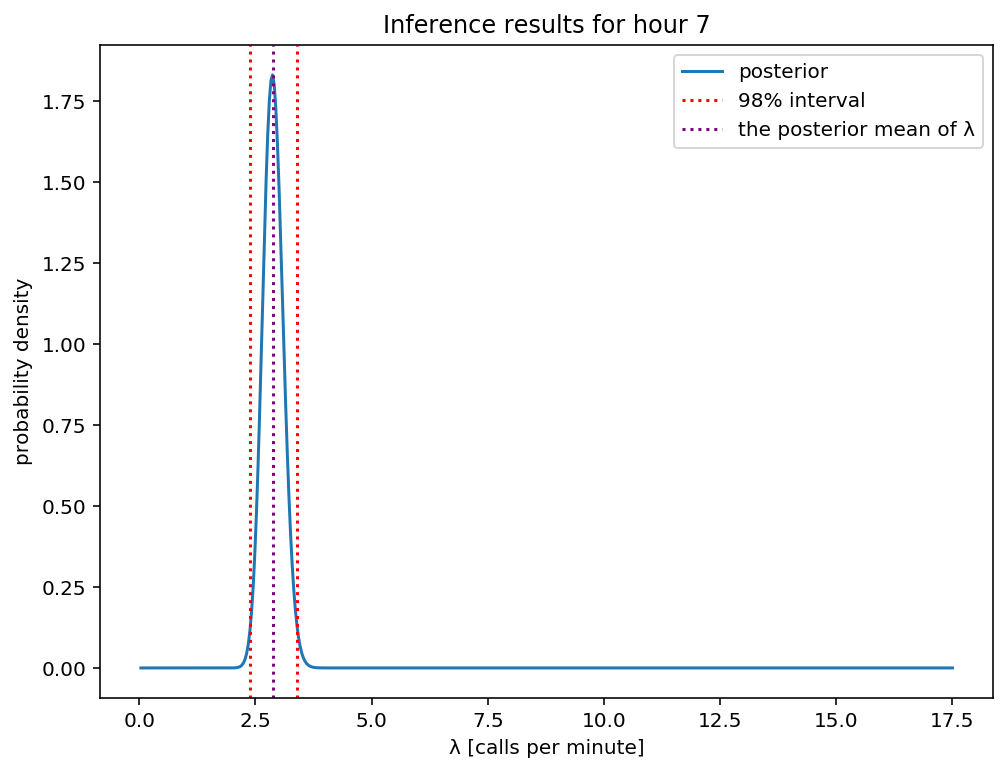

Posterior 98% interval: [2.3800000000000003, 3.3950000000000005] calls per minute
Expected value: λ = 2.881006961605615 calls per minute
[1.5, 0.24, 0.16, 0.072, 0.22, 0.057, 0.14, 0.6, 0.22, 0.025, 0.045, 0.19, 0.0036, 0.15, 0.37, 0.14, 0.21, 0.11, 0.7, 0.1, 0.35, 0.069, 0.29, 0.32, 0.25, 0.072, 0.19, 0.21, 0.34, 0.17, 0.13, 0.54, 0.69, 0.023, 0.026, 0.32, 0.061, 0.12, 0.36, 0.15, 0.15, 0.27, 0.014, 0.44, 0.43, 0.21, 0.14, 0.11, 0.036, 0.0044, 0.045, 0.11, 0.46, 0.37, 0.2, 0.56, 0.66, 0.044, 0.043, 0.17, 0.18, 0.044, 0.29, 0.076, 0.45, 0.56, 0.018, 0.1, 0.053, 0.29, 0.26, 0.42, 0.034, 0.95, 0.048, 0.12, 0.59, 0.26, 0.15, 0.017, 0.42, 0.5, 0.24, 0.25, 0.38, 0.12, 0.11, 0.074, 0.98, 0.48, 0.29, 0.055, 0.44, 0.24, 0.19, 0.89, 0.24, 0.0033, 0.15, 0.16, 0.092, 0.047, 0.23, 0.068, 0.033, 0.32, 0.06, 0.38, 0.32, 0.32, 0.087, 0.052, 0.15, 0.13, 0.7, 0.22, 0.12, 0.041, 0.076, 0.013, 0.34, 0.11, 0.38, 0.021, 0.16, 0.26, 0.22, 0.043, 0.13, 0.48, 0.058, 0.03, 0.054, 0.26, 0.089, 0.25, 0.61, 0.15,

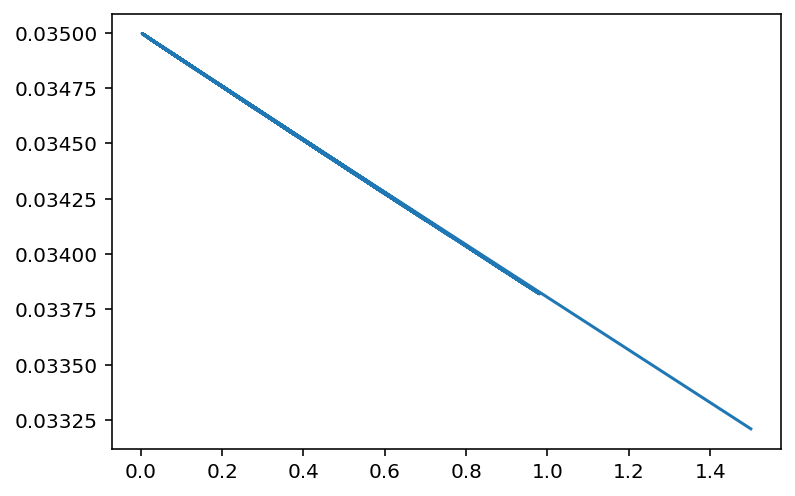

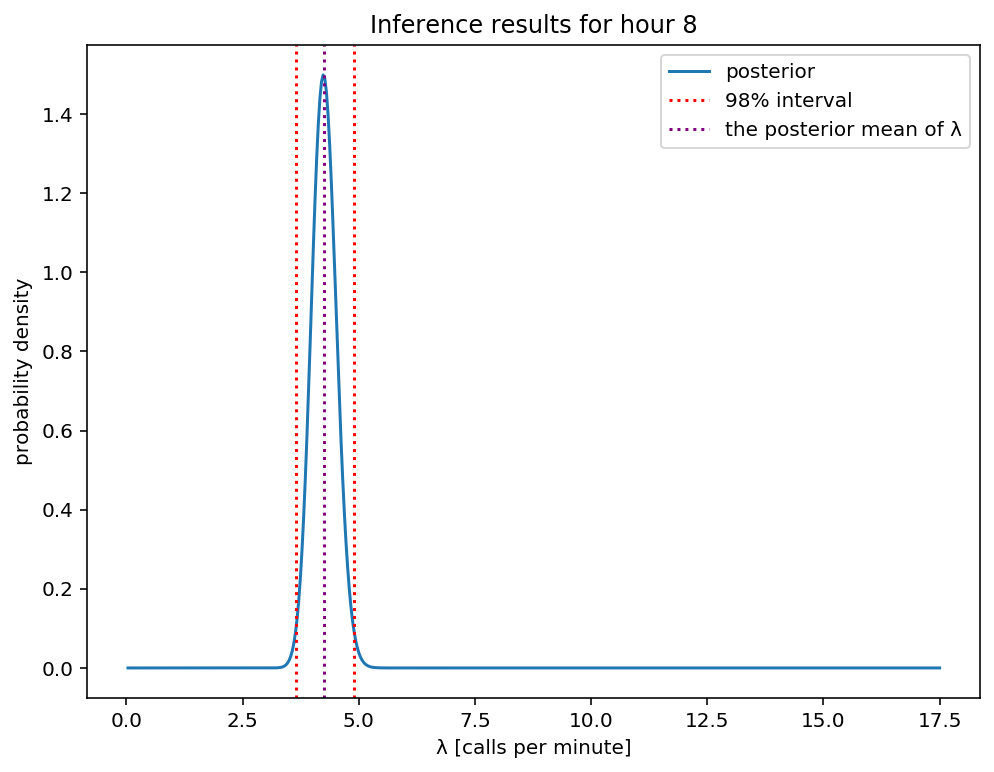

Posterior 98% interval: [3.6400000000000006, 4.9] calls per minute
Expected value: λ = 4.256924597345016 calls per minute
[0.14, 0.043, 0.29, 0.26, 0.18, 0.1, 0.12, 0.32, 0.23, 0.0006, 0.094, 0.033, 0.069, 0.26, 0.36, 0.41, 0.19, 0.062, 0.14, 0.4, 0.22, 0.029, 0.16, 0.28, 0.41, 0.24, 0.13, 0.14, 0.84, 0.094, 0.061, 0.0085, 0.15, 0.11, 0.39, 0.043, 0.021, 0.55, 0.18, 0.065, 0.28, 0.17, 0.074, 0.018, 0.092, 0.14, 0.1, 0.058, 0.14, 0.32, 0.11, 0.14, 0.11, 0.045, 0.0026, 0.22, 0.11, 0.021, 0.091, 0.1, 0.44, 0.018, 0.62, 0.023, 0.066, 0.065, 0.087, 0.1, 0.036, 0.067, 0.16, 0.96, 0.045, 0.22, 0.51, 0.36, 0.033, 0.12, 0.053, 0.22, 0.077, 0.15, 0.0065, 0.2, 0.047, 0.041, 0.58, 0.4, 0.083, 0.018, 0.65, 0.0021, 0.18, 0.07, 0.063, 0.38, 0.022, 0.068, 0.15, 0.18, 0.092, 0.027, 0.3, 0.028, 0.11, 0.14, 0.03, 0.0094, 0.22, 0.21, 0.098, 0.52, 0.045, 0.17, 0.34, 0.036, 0.077, 0.06, 0.073, 0.028, 0.022, 0.13, 0.022, 0.0063, 0.14, 0.0096, 0.0092, 0.1, 0.15, 0.23, 0.091, 0.033, 0.11, 0.041, 0.076, 0.069, 

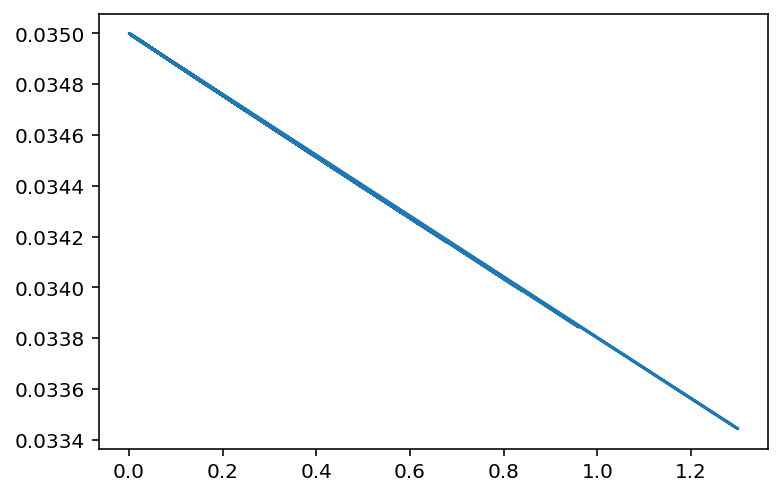

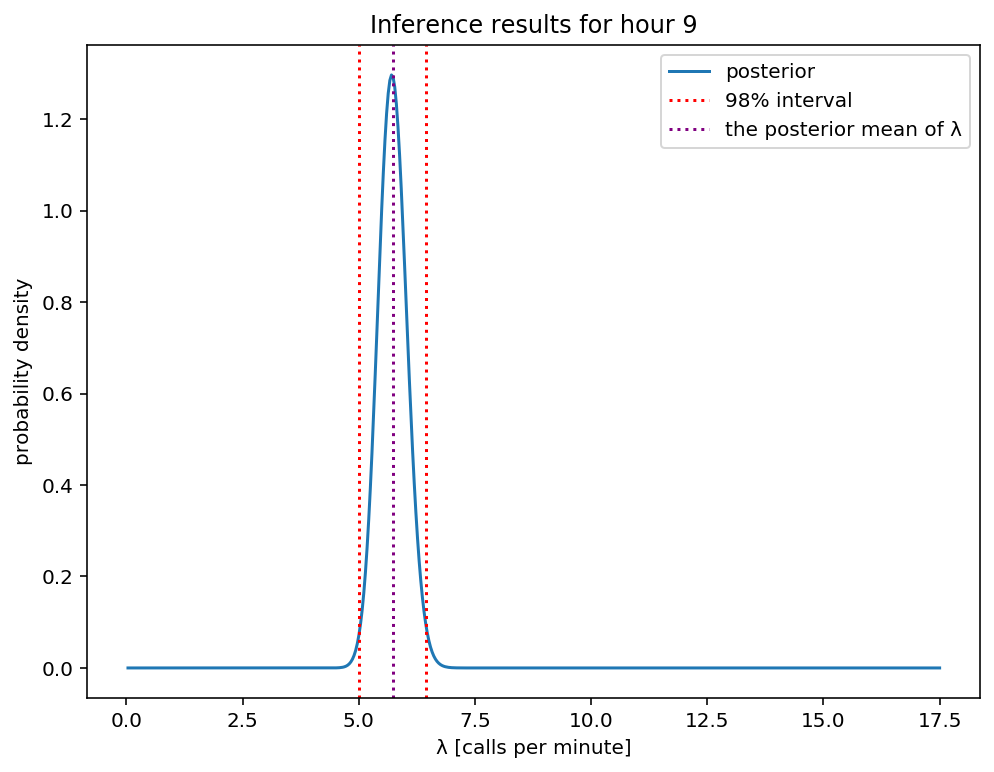

Posterior 98% interval: [5.005000000000001, 6.44] calls per minute
Expected value: λ = 5.728695915357028 calls per minute
[0.26, 0.028, 0.083, 0.065, 0.056, 0.18, 0.025, 0.059, 0.19, 0.067, 0.25, 0.14, 0.084, 0.029, 0.28, 0.016, 0.3, 0.01, 0.19, 0.023, 0.099, 0.019, 0.11, 0.11, 0.051, 0.43, 0.013, 0.011, 0.018, 0.32, 0.15, 0.016, 0.093, 0.029, 0.012, 0.06, 0.099, 0.11, 0.16, 0.021, 0.13, 0.17, 0.018, 0.12, 0.072, 0.12, 0.23, 0.013, 0.16, 0.12, 0.076, 0.17, 0.024, 0.17, 0.016, 0.027, 0.094, 0.007, 0.15, 0.16, 0.068, 0.044, 0.36, 0.04, 0.03, 0.063, 0.046, 0.28, 0.049, 0.24, 0.075, 0.076, 0.04, 0.055, 0.027, 0.032, 0.19, 0.052, 0.26, 0.17, 0.16, 0.063, 0.016, 0.49, 0.01, 0.29, 0.084, 0.049, 0.097, 0.028, 0.082, 0.11, 0.0066, 0.0058, 0.054, 0.3, 0.17, 0.13, 0.14, 0.047, 0.12, 0.28, 0.15, 0.026, 0.12, 0.12, 0.076, 0.098, 0.091, 0.18, 0.028, 0.19, 0.096, 0.077, 0.027, 0.28, 0.066, 0.39, 0.096, 0.62, 0.044, 0.22, 0.035, 0.2, 0.077, 0.17, 0.076, 0.11, 0.05, 0.12, 0.055, 0.071, 0.18, 0.011, 0.2

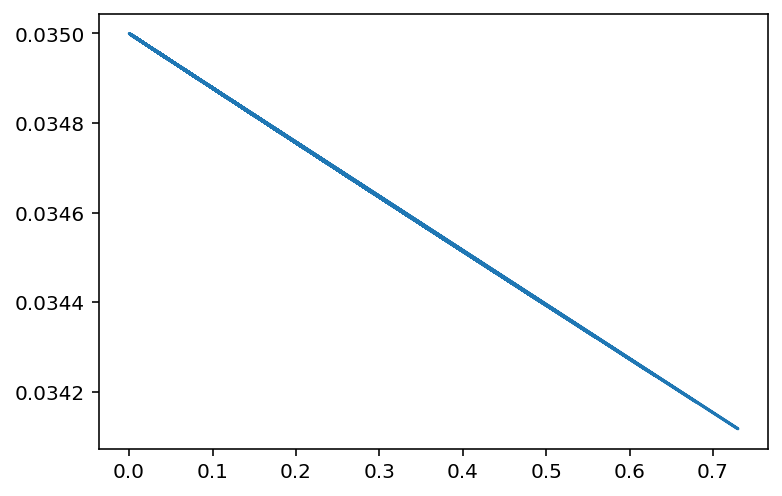

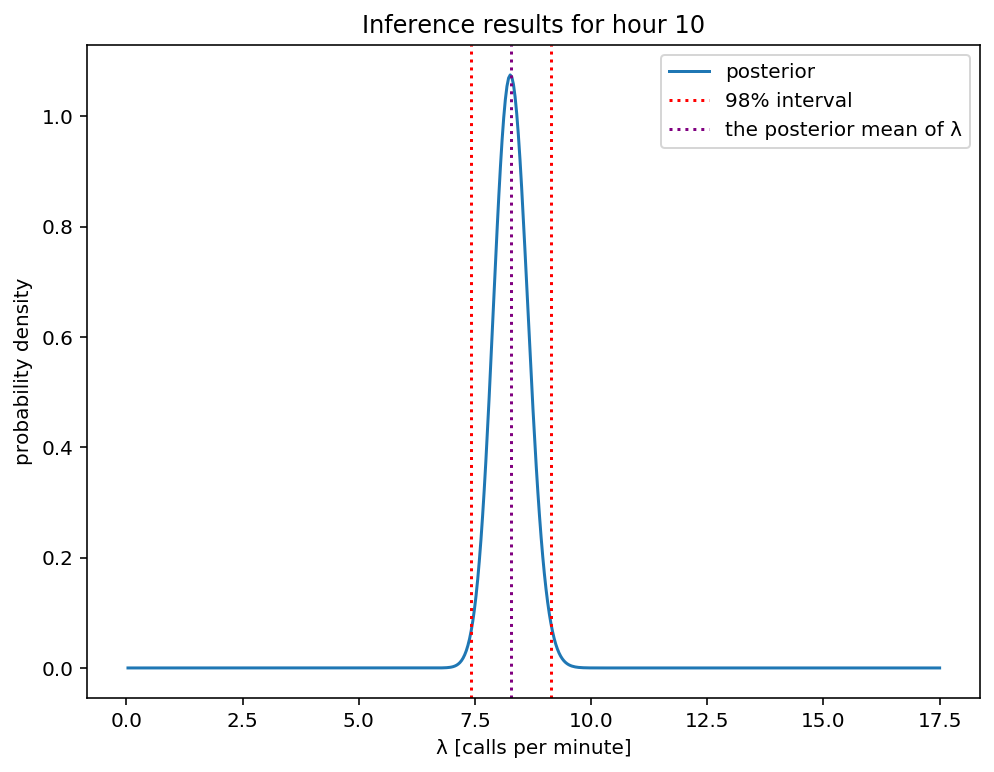

Posterior 98% interval: [7.420000000000001, 9.135000000000002] calls per minute
Expected value: λ = 8.2794764772077 calls per minute
[0.39, 0.0016, 0.007, 0.02, 0.063, 0.0014, 0.14, 0.029, 0.15, 0.038, 0.2, 0.022, 0.11, 0.095, 0.058, 0.16, 0.035, 0.035, 0.051, 0.015, 0.088, 0.057, 0.014, 0.019, 0.014, 0.0018, 0.24, 0.097, 0.18, 0.029, 0.11, 0.017, 0.28, 0.061, 0.071, 0.054, 0.03, 0.059, 0.025, 0.1, 0.013, 0.043, 0.022, 0.036, 0.039, 0.032, 0.029, 0.018, 0.16, 0.052, 0.1, 0.017, 0.46, 0.091, 0.1, 0.0052, 0.049, 0.19, 0.22, 0.028, 0.012, 0.12, 0.006, 0.13, 0.032, 0.04, 0.027, 0.094, 0.035, 0.061, 0.12, 0.058, 0.12, 0.0023, 0.13, 0.00094, 0.0087, 0.078, 0.063, 0.053, 0.0015, 0.031, 0.096, 0.079, 0.062, 0.065, 0.034, 0.058, 0.05, 0.053, 0.019, 0.017, 0.056, 0.052, 0.14, 0.078, 0.042, 0.033, 0.09, 0.0034, 0.081, 0.055, 0.12, 0.1, 0.073, 0.025, 0.028, 0.095, 0.05, 0.0087, 0.013, 0.052, 0.022, 0.061, 0.021, 0.078, 0.011, 0.094, 0.0076, 0.034, 0.17, 0.029, 0.02, 0.068, 0.058, 0.11, 0.32, 0.16,

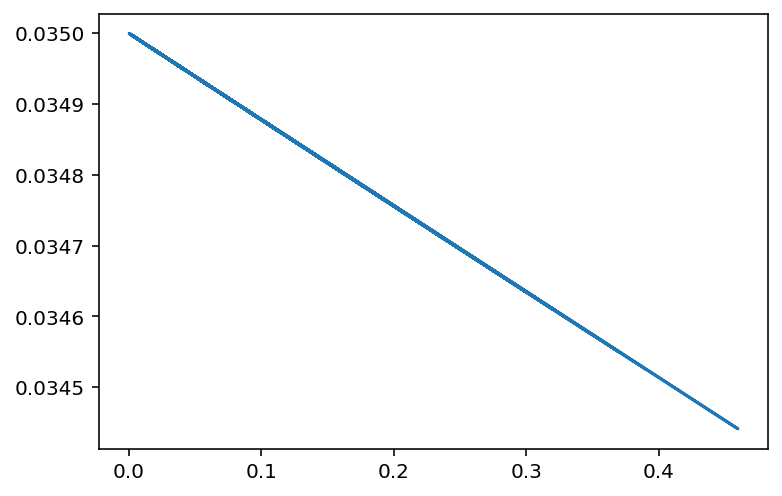

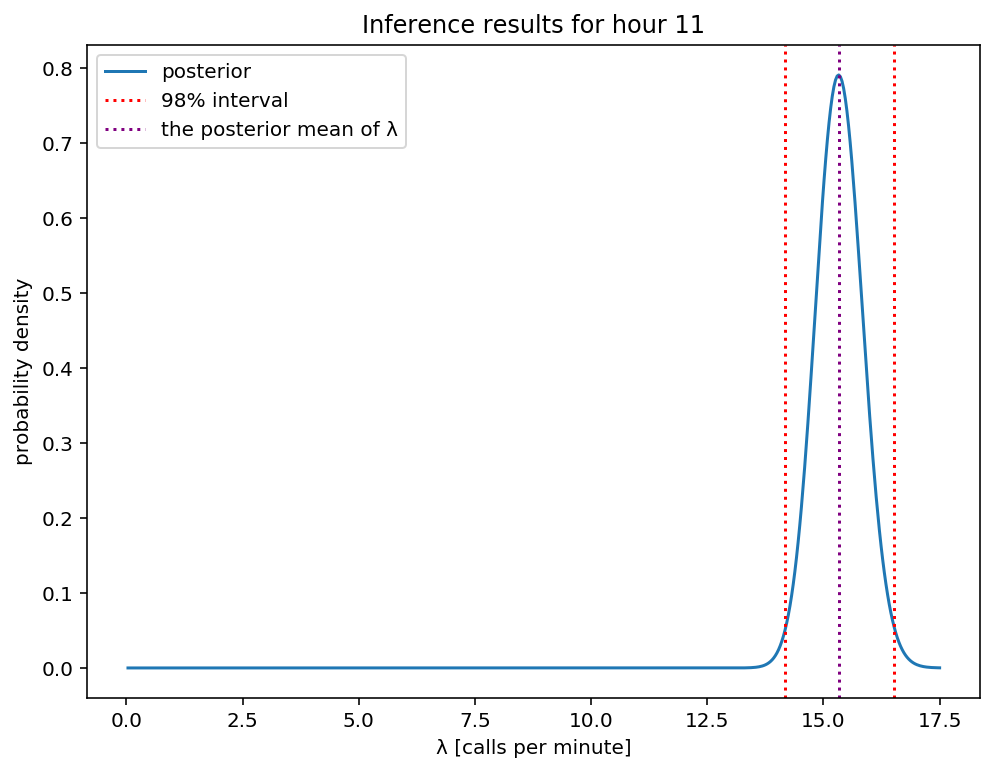

Posterior 98% interval: [14.175, 16.520000000000003] calls per minute
Expected value: λ = 15.342705961185622 calls per minute
[0.027, 0.012, 0.0083, 0.019, 0.025, 0.098, 0.022, 0.055, 0.018, 0.0045, 0.07, 0.23, 0.056, 0.074, 0.22, 0.079, 0.0051, 0.065, 0.047, 0.0077, 0.02, 0.035, 0.029, 0.046, 0.24, 0.071, 0.025, 0.19, 0.0094, 0.06, 0.044, 0.051, 0.037, 0.029, 0.017, 0.016, 0.011, 0.0054, 0.11, 0.15, 0.16, 0.00034, 0.064, 0.065, 0.12, 0.15, 0.013, 0.053, 0.15, 0.0044, 0.00059, 0.0045, 0.15, 0.098, 0.017, 0.046, 0.0088, 0.043, 0.16, 0.05, 0.057, 0.023, 0.089, 0.011, 0.097, 0.089, 0.19, 0.073, 0.095, 0.04, 0.68, 0.07, 0.033, 0.15, 0.16, 0.059, 0.055, 0.011, 0.064, 0.026, 0.027, 0.11, 0.0016, 0.091, 0.00074, 0.11, 0.14, 0.042, 0.035, 0.055, 0.058, 0.091, 0.082, 0.055, 0.017, 0.06, 0.15, 0.011, 0.074, 0.053, 0.0079, 0.0062, 0.078, 0.19, 0.029, 0.1, 0.12, 0.046, 0.022, 0.04, 0.00093, 0.034, 0.18, 0.0045, 0.11, 0.12, 0.011, 0.15, 0.022, 0.045, 0.0083, 0.15, 0.019, 0.14, 0.046, 0.21, 0.053, 0

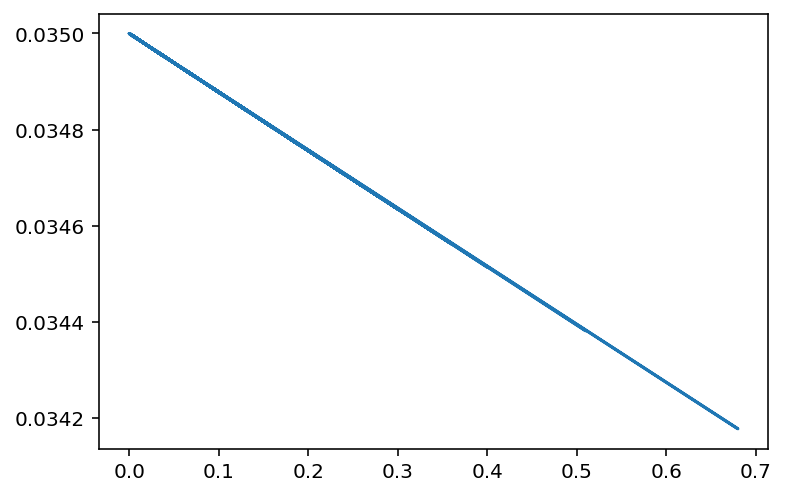

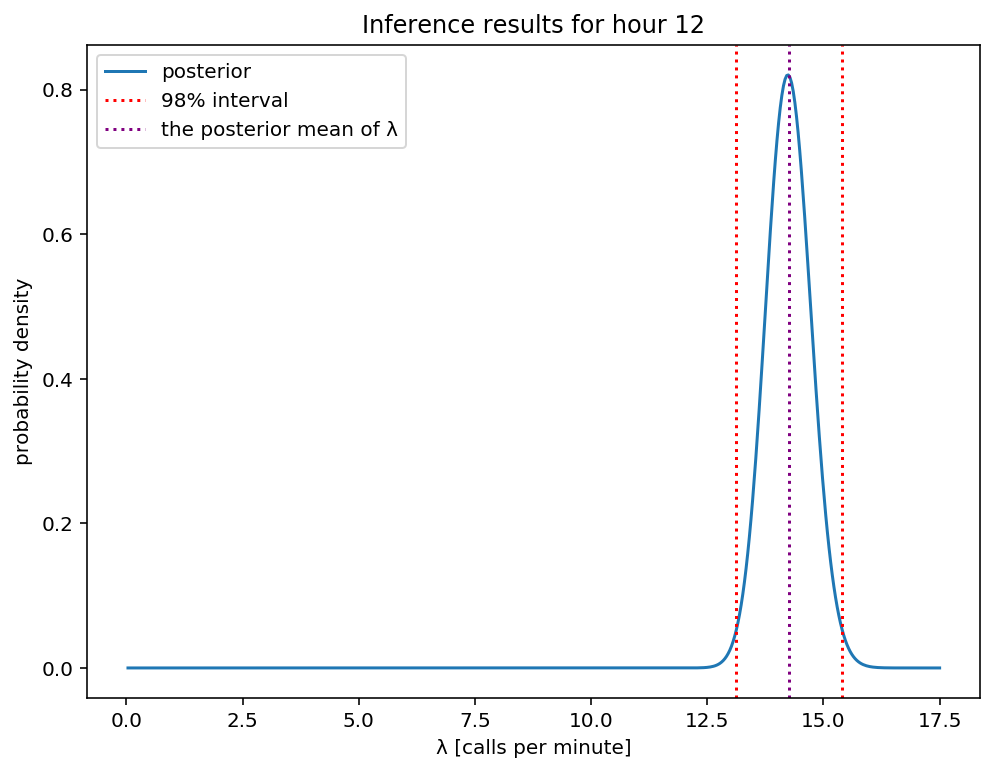

Posterior 98% interval: [13.125000000000002, 15.400000000000002] calls per minute
Expected value: λ = 14.250688382350878 calls per minute
[0.068, 1.0, 0.19, 0.16, 0.07, 0.035, 0.1, 0.18, 0.17, 0.042, 0.58, 0.069, 0.0046, 0.015, 0.16, 0.12, 0.12, 0.096, 0.17, 0.57, 0.36, 0.2, 0.038, 0.098, 0.13, 0.26, 0.34, 0.082, 0.24, 0.062, 0.15, 0.071, 0.12, 0.14, 0.16, 0.076, 0.1, 0.099, 0.062, 0.055, 0.03, 0.032, 0.22, 0.031, 0.097, 0.11, 0.094, 0.85, 0.061, 0.14, 0.011, 0.0085, 0.092, 0.13, 0.055, 0.12, 0.28, 0.77, 0.052, 0.16, 0.53, 0.16, 0.23, 0.043, 0.02, 0.071, 0.15, 0.022, 0.0052, 0.096, 0.59, 0.15, 0.14, 0.067, 0.11, 0.57, 0.036, 0.085, 0.23, 0.019, 0.44, 0.049, 0.058, 0.21, 0.1, 0.13, 0.083, 0.014, 0.076, 0.12, 0.47, 0.12, 0.0025, 0.077, 0.28, 0.12, 0.16, 0.068, 0.025, 0.15, 0.23, 0.083, 0.059, 0.17, 0.034, 0.028, 0.027, 0.12, 0.0078, 0.32, 0.19, 0.044, 0.4, 0.2, 0.15, 0.078, 0.15, 0.061, 0.21, 0.34, 0.049, 0.2, 0.23, 0.58, 0.013, 0.012, 0.18, 0.13, 0.22, 0.044, 0.59, 0.17, 0.039, 0.16, 0.

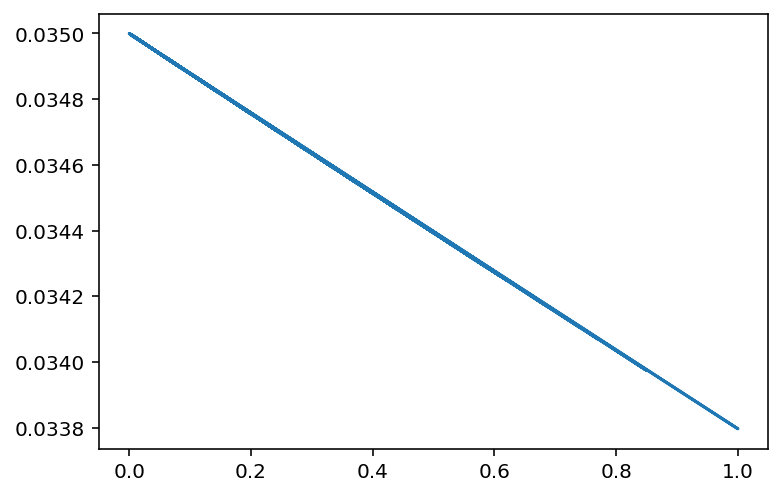

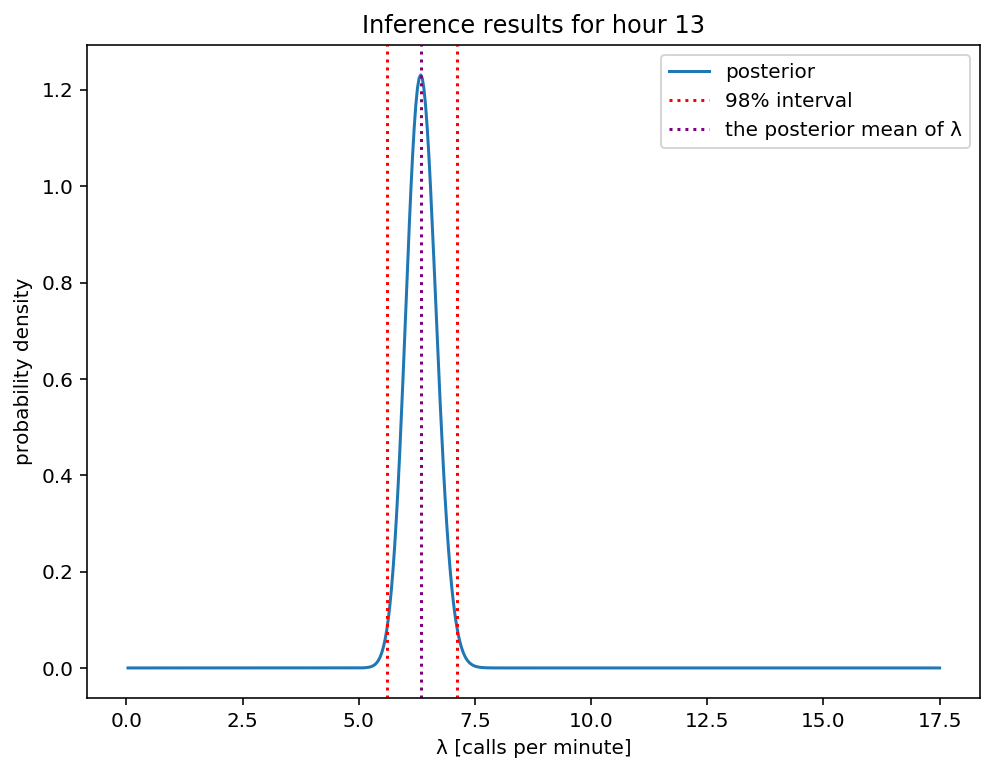

Posterior 98% interval: [5.6000000000000005, 7.105] calls per minute
Expected value: λ = 6.34942318060014 calls per minute
[0.51, 0.62, 0.0028, 0.75, 0.4, 0.12, 0.64, 0.35, 0.021, 0.38, 0.29, 0.94, 0.24, 0.3, 0.071, 0.38, 0.73, 0.035, 0.16, 0.093, 0.12, 0.26, 0.82, 0.35, 0.034, 0.0081, 0.58, 0.06, 1.2, 0.05, 0.1, 0.11, 0.28, 0.15, 0.054, 0.48, 0.48, 0.7, 0.27, 0.79, 0.083, 0.28, 0.15, 0.38, 0.17, 0.4, 0.31, 0.5, 0.48, 0.59, 0.028, 0.84, 0.056, 0.72, 0.26, 0.019, 0.086, 0.05, 0.09, 0.059, 0.34, 0.17, 0.0088, 0.36, 0.04, 0.1, 0.31, 0.67, 0.14, 0.37, 0.91, 0.17, 0.0028, 0.21, 0.31, 0.079, 0.059, 0.068, 0.043, 0.17, 0.29, 0.25, 0.096, 0.076, 0.073, 0.65, 0.31, 0.3, 0.055, 0.18, 0.077, 0.66, 0.33, 0.71, 0.078, 0.47, 0.71, 0.34, 0.064, 0.0014, 0.48, 0.21, 0.0068, 0.066, 0.029, 0.038, 0.04, 0.31, 0.4, 0.3, 0.17, 0.34, 0.8, 0.56, 0.013, 2.0, 0.58, 0.026, 0.82, 0.19, 0.048, 0.054, 0.11, 0.045, 0.00031, 0.4, 0.028, 0.66, 0.16, 0.59, 0.6, 0.43, 0.57, 0.28, 0.24, 0.33, 0.36, 0.015, 0.66, 0.055, 0.

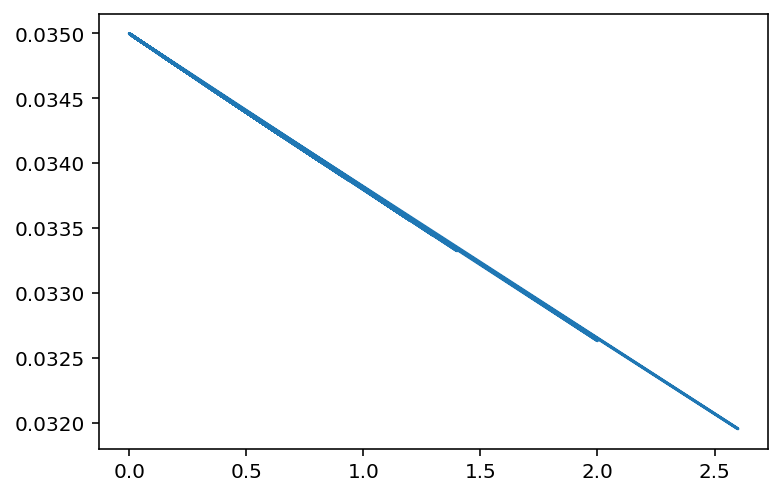

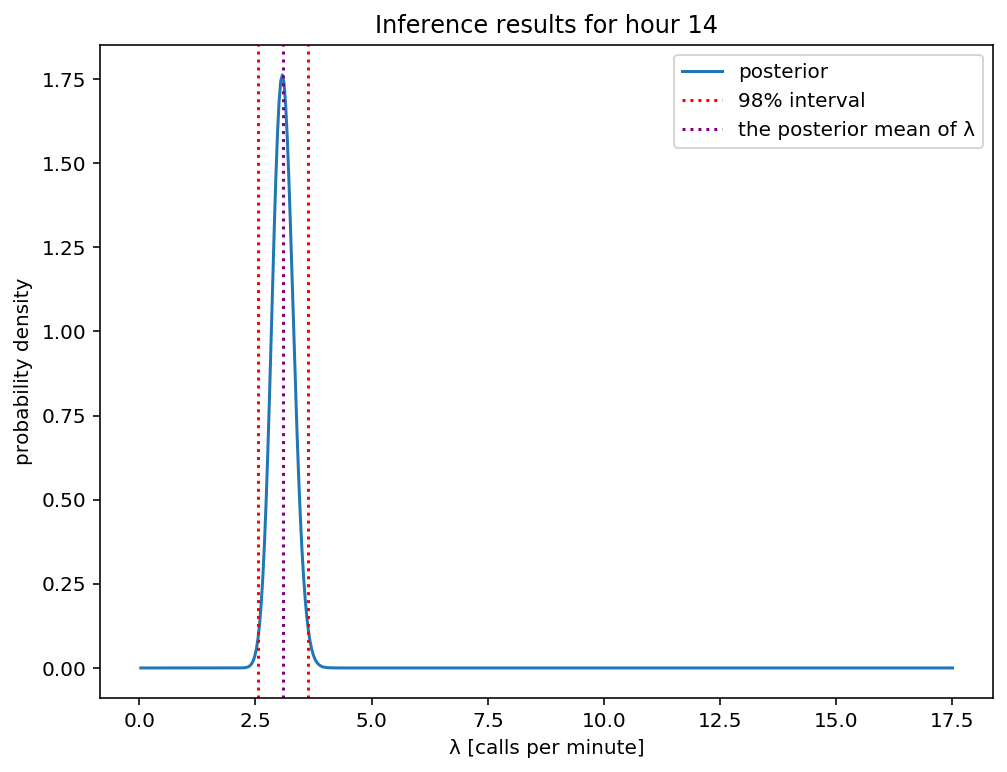

Posterior 98% interval: [2.555, 3.6400000000000006] calls per minute
Expected value: λ = 3.094053744378928 calls per minute
[0.0067, 0.029, 0.33, 0.46, 0.62, 0.64, 0.0015, 0.42, 0.1, 0.7, 0.24, 0.33, 0.14, 0.65, 0.78, 0.15, 0.16, 0.057, 0.34, 0.39, 0.19, 0.085, 0.065, 0.24, 0.0011, 0.02, 0.29, 0.095, 0.62, 1.3, 0.15, 0.26, 0.27, 0.23, 0.15, 0.3, 0.29, 0.6, 0.45, 0.16, 0.66, 1.2, 0.15, 0.086, 0.11, 0.32, 0.5, 0.17, 0.11, 0.17, 1.0, 0.46, 0.14, 0.089, 0.8, 0.12, 0.06, 0.11, 0.058, 0.16, 0.53, 0.47, 0.7, 0.098, 0.11, 1.3, 0.33, 0.22, 0.2, 0.2, 0.23, 0.058, 0.7, 0.39, 0.53, 0.17, 0.00033, 0.099, 0.17, 0.32, 0.07, 0.4, 0.041, 0.02, 0.07, 0.014, 0.16, 0.075, 0.51, 0.091, 0.37, 0.038, 0.32, 0.25, 0.0053, 0.12, 0.055, 0.36, 0.97, 0.14, 0.2, 0.22, 0.12, 0.71, 0.043, 0.01, 0.3, 1.3, 0.32, 0.047, 1.1, 0.022, 0.15, 0.17, 0.031, 0.034, 0.54, 0.1, 0.15, 0.014, 0.41, 0.22, 0.066, 0.26, 0.65, 0.21, 0.21, 0.22, 0.82, 0.22, 0.21, 0.021, 0.035, 0.81, 0.083, 0.15, 0.17, 0.19, 0.12, 0.19, 0.87, 0.062, 0.29

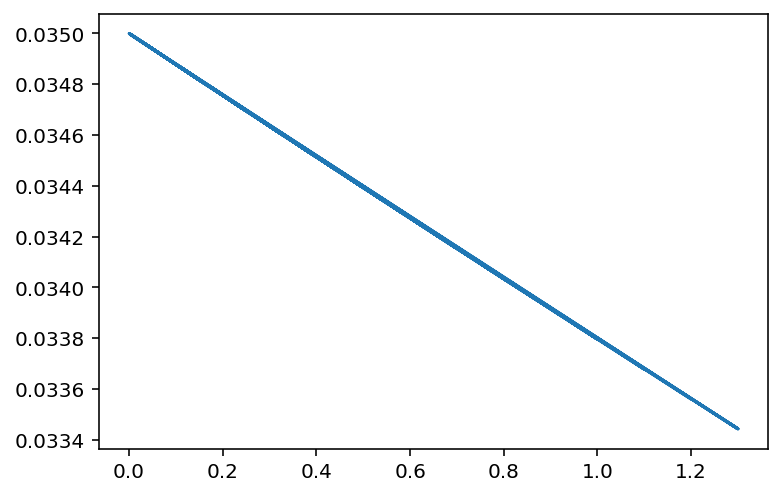

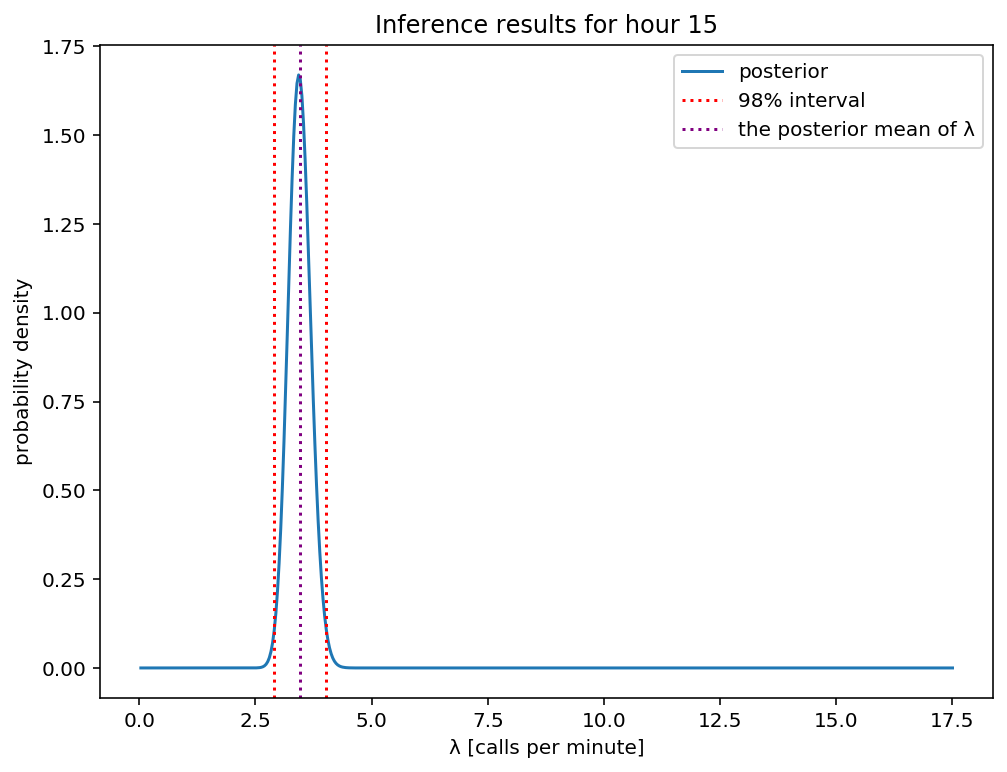

Posterior 98% interval: [2.9050000000000002, 4.025] calls per minute
Expected value: λ = 3.452205951304311 calls per minute
[0.15, 0.27, 0.24, 0.023, 0.098, 0.23, 0.23, 0.07, 0.05, 0.031, 0.058, 0.24, 0.61, 0.17, 0.17, 0.31, 0.31, 0.2, 0.0013, 0.19, 0.22, 0.15, 0.19, 1.2, 0.11, 0.61, 0.29, 0.18, 0.25, 0.28, 0.041, 0.15, 1.4, 0.069, 0.12, 0.024, 0.26, 0.93, 0.1, 0.022, 0.44, 0.0054, 0.0013, 0.035, 0.23, 0.12, 0.27, 0.12, 0.18, 0.021, 0.055, 0.22, 0.43, 0.2, 0.078, 0.2, 0.39, 0.22, 0.036, 0.35, 0.12, 0.17, 0.92, 0.52, 0.2, 0.25, 0.43, 0.73, 0.99, 1.0, 0.079, 0.071, 0.0048, 0.33, 0.17, 0.097, 0.072, 0.13, 0.035, 0.7, 0.11, 0.061, 0.049, 0.11, 0.086, 0.1, 0.049, 0.33, 0.12, 0.053, 0.025, 0.63, 0.046, 0.11, 0.095, 0.2, 0.53, 0.078, 0.81, 0.24, 0.37, 0.32, 0.14, 0.012, 0.069, 0.01, 0.65, 0.29, 0.038, 0.073, 0.0069, 0.28, 0.02, 0.45, 0.035, 0.087, 0.031, 0.65, 0.056, 0.4, 0.071, 0.57, 0.18, 0.19, 0.13, 0.12, 0.26, 0.22, 0.3, 0.14, 0.47, 0.0095, 0.039, 0.14, 0.22, 0.023, 0.069, 0.039, 0.48, 0.

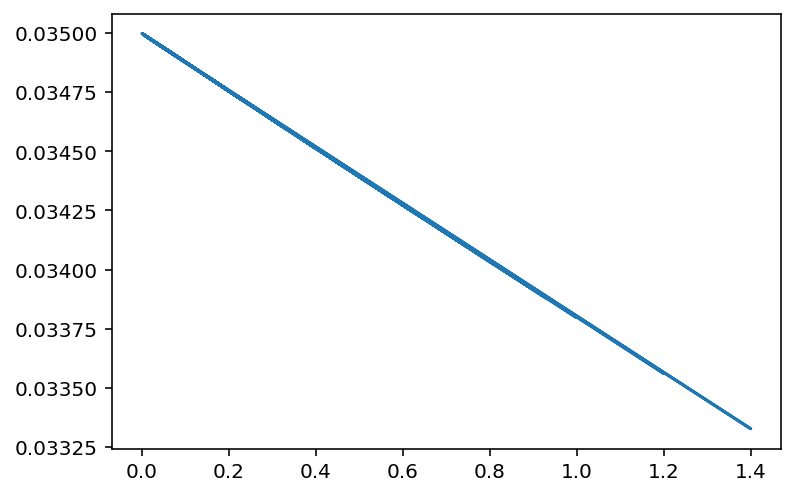

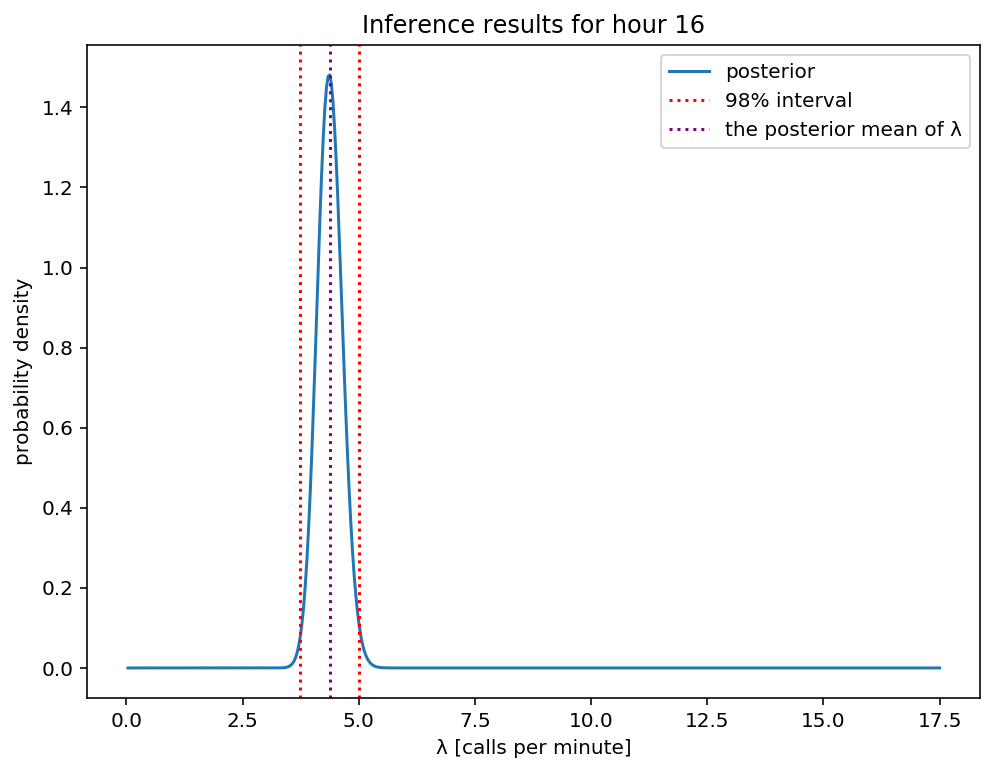

Posterior 98% interval: [3.7450000000000006, 5.005000000000001] calls per minute
Expected value: λ = 4.379532982528318 calls per minute
[0.066, 0.0082, 0.12, 0.033, 0.17, 0.0045, 0.38, 0.15, 0.1, 0.17, 0.01, 0.21, 0.053, 0.7, 0.17, 0.087, 0.24, 0.088, 0.024, 0.25, 0.088, 0.13, 0.035, 0.0069, 0.29, 0.26, 0.095, 0.22, 0.074, 0.033, 0.19, 0.33, 0.15, 0.12, 0.46, 0.13, 0.059, 0.07, 0.0035, 0.095, 0.016, 0.046, 0.16, 0.16, 0.0074, 0.24, 0.097, 0.088, 0.2, 0.023, 0.081, 0.27, 0.0054, 0.022, 0.032, 0.27, 0.19, 0.24, 0.074, 0.13, 0.19, 0.5, 0.024, 0.1, 0.072, 0.013, 0.14, 0.31, 0.23, 0.012, 0.044, 0.083, 0.065, 0.26, 0.028, 0.00025, 0.12, 0.025, 0.11, 0.079, 0.39, 0.12, 0.051, 0.093, 0.19, 0.49, 0.2, 0.29, 0.2, 0.24, 0.02, 0.11, 0.15, 0.078, 0.02, 0.32, 0.16, 0.066, 0.067, 0.5, 0.022, 0.14, 0.24, 0.037, 0.0049, 0.13, 0.044, 0.34, 0.12, 0.21, 0.071, 0.023, 0.062, 0.018, 0.13, 0.015, 0.37, 0.043, 0.11, 0.066, 0.045, 0.12, 0.017, 0.11, 0.33, 0.19, 0.17, 0.091, 0.13, 0.067, 0.3, 0.24, 0.28, 0.13, 

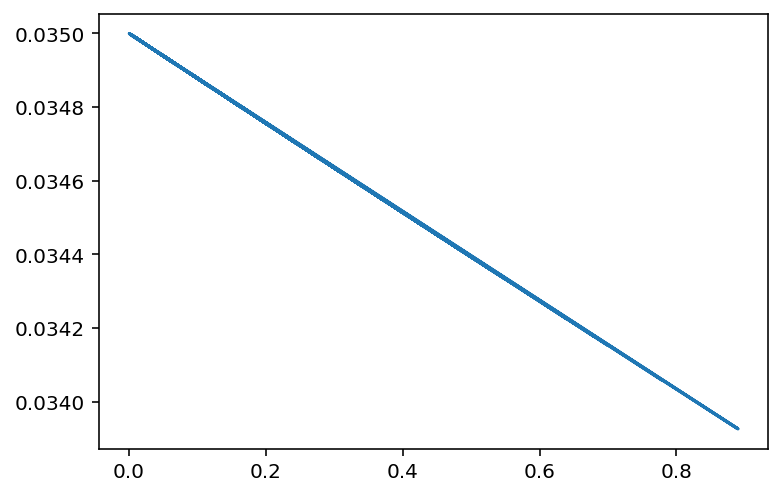

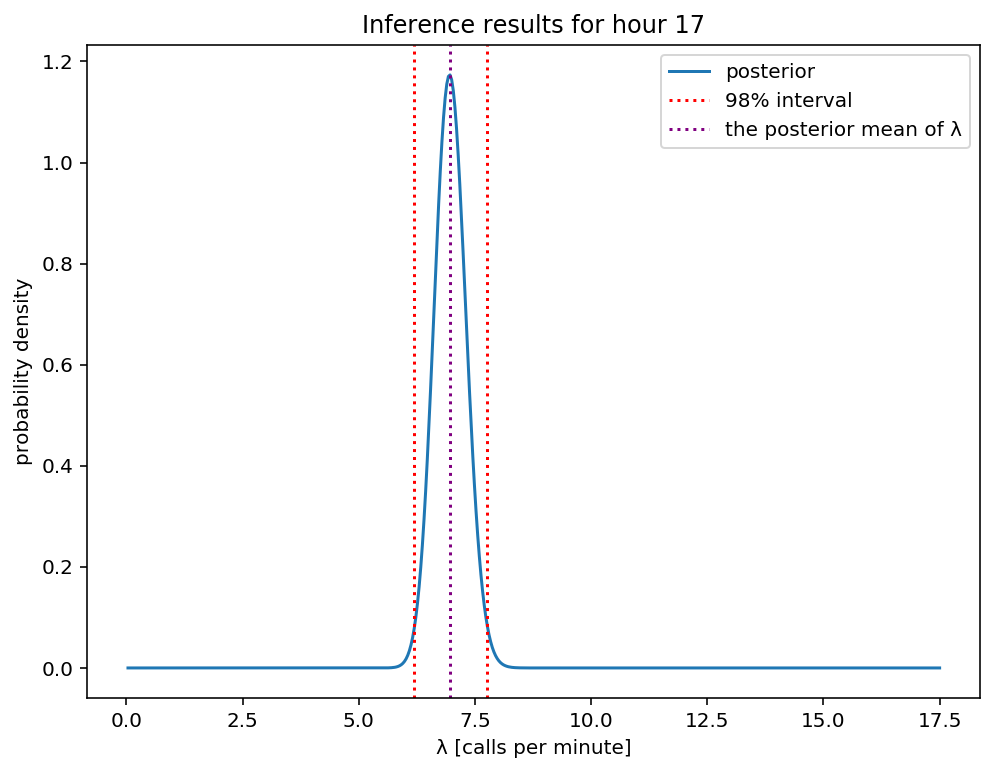

Posterior 98% interval: [6.195, 7.7700000000000005] calls per minute
Expected value: λ = 6.972251600671263 calls per minute
[0.078, 0.16, 0.027, 0.005, 0.057, 0.19, 0.051, 0.1, 0.017, 0.23, 0.07, 0.055, 0.15, 0.27, 0.053, 0.13, 0.073, 0.51, 0.18, 0.045, 0.086, 0.017, 0.16, 0.043, 0.043, 0.2, 0.056, 0.11, 0.082, 0.0086, 0.2, 0.18, 0.22, 0.26, 0.22, 0.064, 0.052, 0.29, 0.35, 0.032, 0.3, 0.19, 0.22, 0.041, 0.11, 0.33, 0.0051, 0.081, 0.077, 0.21, 0.15, 0.073, 0.25, 0.0083, 0.017, 0.1, 0.15, 0.31, 0.16, 0.006, 0.45, 0.16, 0.025, 0.23, 0.11, 0.23, 0.011, 0.028, 0.022, 0.11, 0.045, 0.28, 0.039, 0.025, 0.25, 0.069, 0.043, 0.035, 0.17, 0.028, 0.021, 0.022, 0.0069, 0.026, 0.14, 0.15, 0.066, 0.1, 0.09, 0.012, 0.05, 0.2, 0.0035, 0.023, 0.052, 0.0036, 0.11, 0.0028, 0.047, 0.19, 0.26, 0.3, 0.0079, 0.15, 0.034, 0.15, 0.18, 0.63, 0.12, 0.052, 0.021, 0.17, 0.0027, 0.3, 0.011, 0.03, 0.0049, 0.12, 0.013, 0.11, 0.0091, 0.1, 0.11, 0.12, 0.018, 0.046, 0.0093, 0.061, 0.25, 0.2, 0.026, 0.02, 0.14, 0.16, 0.13,

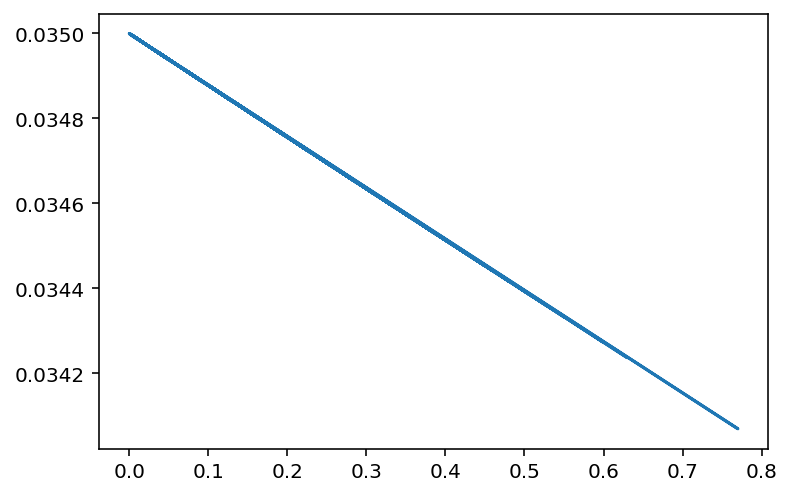

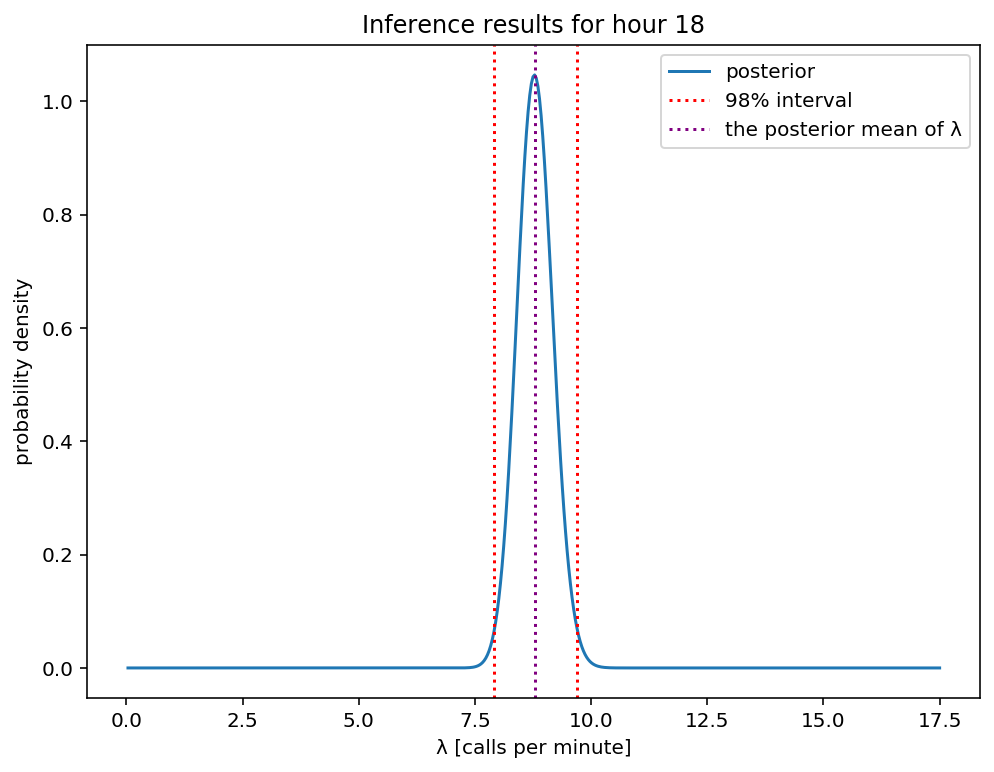

Posterior 98% interval: [7.910000000000001, 9.695] calls per minute
Expected value: λ = 8.79721681856211 calls per minute
[0.0095, 0.06, 0.028, 0.069, 0.075, 0.22, 0.054, 0.077, 0.05, 0.047, 0.15, 0.19, 0.056, 0.0055, 0.3, 0.028, 0.13, 0.31, 0.33, 0.017, 0.06, 0.06, 0.29, 0.19, 0.23, 0.16, 0.3, 0.0036, 0.22, 0.2, 0.035, 0.095, 0.065, 0.16, 0.092, 0.088, 0.012, 0.11, 0.025, 0.18, 0.085, 0.041, 0.071, 0.5, 0.012, 0.056, 0.34, 0.22, 0.29, 0.042, 0.012, 0.031, 0.3, 0.12, 0.026, 0.11, 0.2, 0.019, 0.035, 0.22, 0.16, 0.12, 0.51, 0.11, 0.15, 0.088, 0.32, 0.29, 0.41, 0.11, 0.028, 0.056, 0.09, 0.38, 0.14, 0.03, 0.18, 0.24, 0.044, 0.0019, 0.24, 0.38, 0.36, 0.077, 0.044, 0.27, 0.02, 0.066, 0.079, 0.086, 0.05, 0.13, 0.23, 0.022, 0.00048, 0.15, 0.2, 0.032, 0.032, 0.53, 0.064, 0.28, 0.13, 0.032, 0.029, 0.18, 0.041, 0.17, 0.0049, 0.13, 0.14, 0.27, 0.023, 0.007, 0.18, 0.2, 0.36, 0.14, 0.38, 0.17, 0.15, 0.16, 0.041, 0.097, 0.17, 0.065, 0.09, 0.12, 0.005, 0.074, 0.15, 0.023, 0.38, 0.12, 0.027, 0.047, 0.1

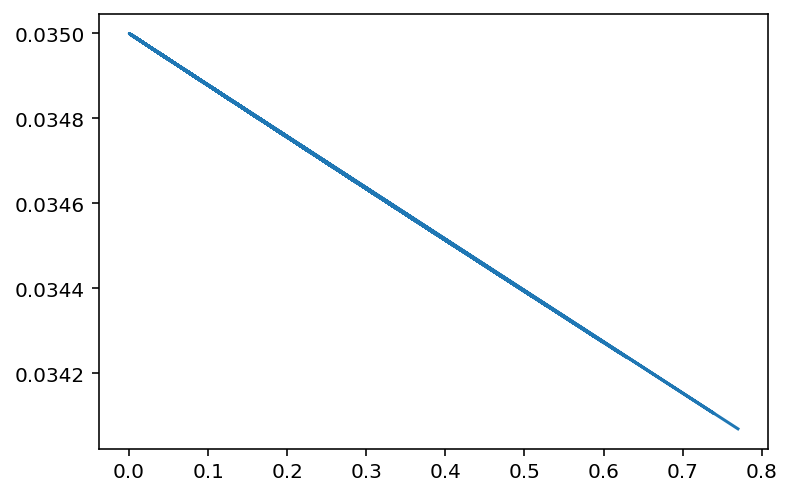

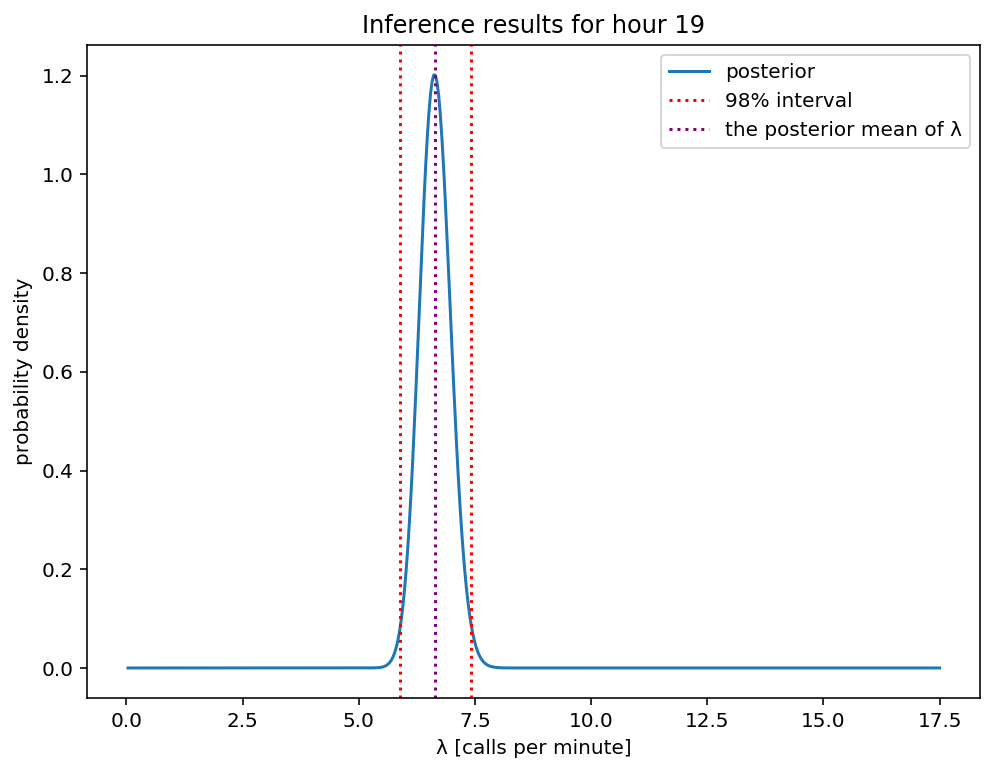

Posterior 98% interval: [5.880000000000001, 7.420000000000001] calls per minute
Expected value: λ = 6.647526432206255 calls per minute
[0.7, 0.33, 0.073, 0.38, 0.56, 0.06, 0.3, 0.58, 0.24, 0.38, 0.87, 0.066, 0.31, 0.082, 0.66, 0.54, 0.26, 0.14, 0.71, 0.065, 0.17, 0.83, 0.72, 0.64, 0.4, 0.12, 0.75, 0.38, 0.013, 0.89, 0.52, 0.003, 0.56, 0.16, 0.048, 0.81, 0.85, 1.2, 0.52, 0.31, 0.14, 0.1, 0.00088, 0.76, 0.038, 1.3, 0.77, 0.75, 0.15, 0.4, 1.3, 1.1, 1.5, 0.79, 0.0069, 0.06, 0.65, 0.065, 0.5, 0.4, 0.15, 0.34, 0.39, 0.43, 0.37, 0.72, 1.4, 0.25, 0.079, 0.53, 0.28, 0.62, 0.43, 0.032, 0.14, 0.7, 0.95, 0.23, 0.18, 0.44, 0.4, 0.19, 0.18, 0.045, 0.035, 0.74, 0.022, 0.26, 0.79, 0.066, 0.57, 0.82, 0.29, 0.062, 0.52, 1.0, 0.091, 0.62, 0.39, 0.98, 0.27, 0.21, 0.041, 0.33, 0.31, 0.066, 0.88, 0.12, 1.2, 0.21, 0.91, 0.24, 0.48, 0.27, 0.014, 0.12, 0.11, 0.21, 0.012, 0.025, 0.37, 0.85, 0.5, 0.23, 1.6, 0.41, 0.03, 0.35, 0.84, 0.039, 0.23, 0.48, 0.24, 1.9, 0.23, 0.0011, 1.1]


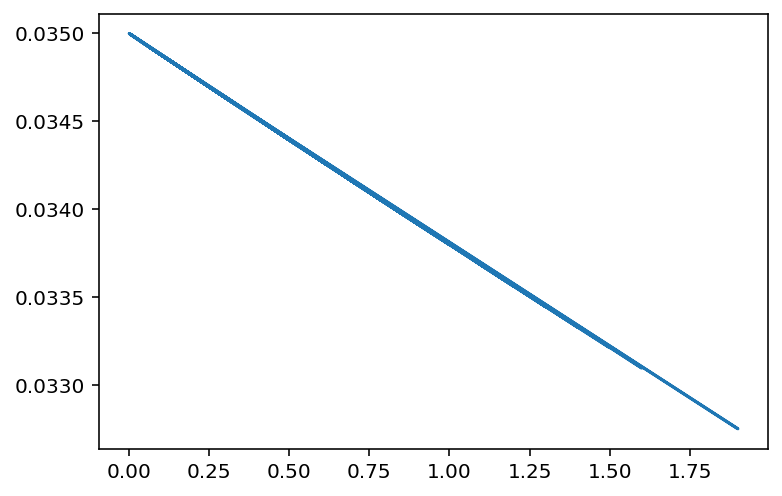

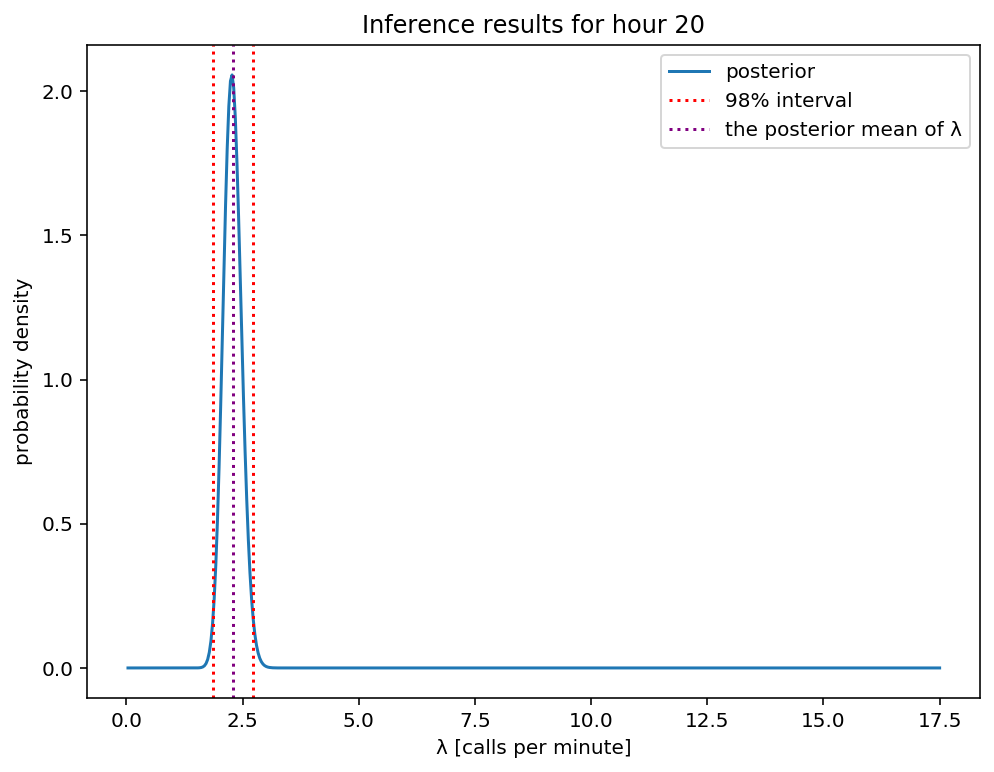

Posterior 98% interval: [1.8550000000000002, 2.7300000000000004] calls per minute
Expected value: λ = 2.2851132488879116 calls per minute
[0.6, 0.79, 6.5, 0.83, 0.95, 1.0, 1.2, 0.11, 1.5, 1.2, 1.1, 2.3, 2.0, 2.3, 0.35, 1.7, 0.15, 3.2, 0.4, 0.16, 0.38, 1.9, 0.066, 2.4, 1.2, 1.3, 0.39, 0.94, 1.2, 0.18, 0.63, 0.32, 0.56, 1.2, 0.96, 0.61, 0.18, 0.41, 1.1, 0.031, 5.2, 0.64, 3.1, 0.52, 0.24, 0.13, 0.47, 1.7, 0.68, 0.58, 4.8]


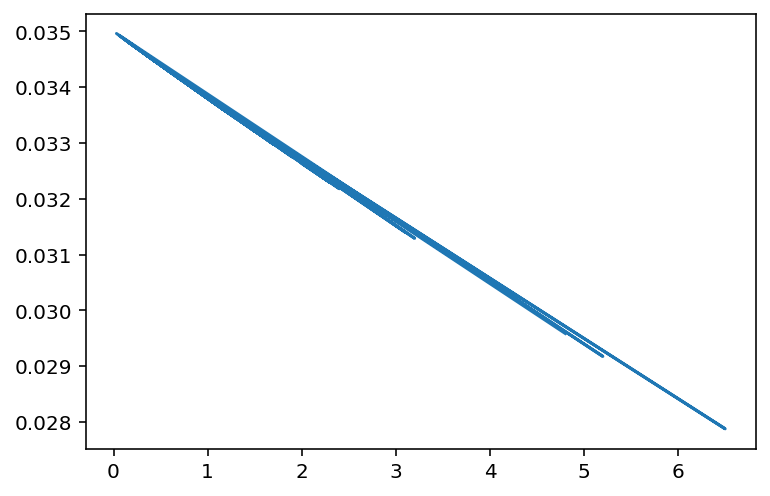

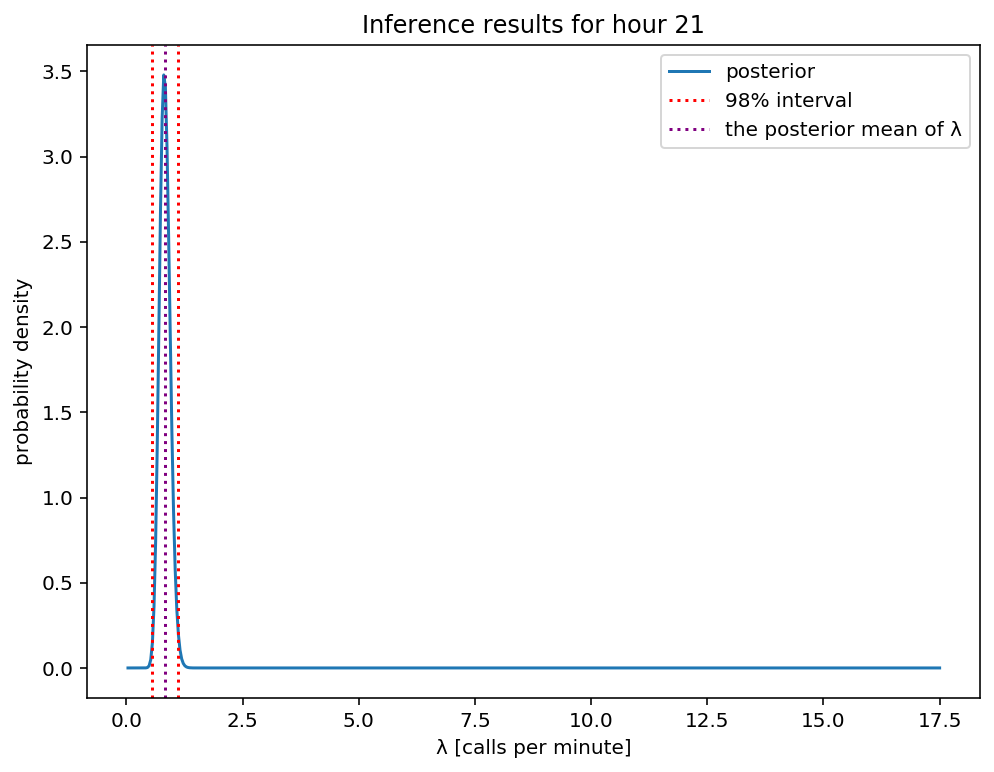

Posterior 98% interval: [0.56, 1.12] calls per minute
Expected value: λ = 0.8305780503777533 calls per minute
[4.3, 7.0, 2.8, 0.69, 0.16, 1.8, 1.1, 2.5, 0.9, 7.3, 3.0, 3.9, 2.2, 1.1, 1.4, 4.9, 2.1, 2.6, 5.0, 6.6]


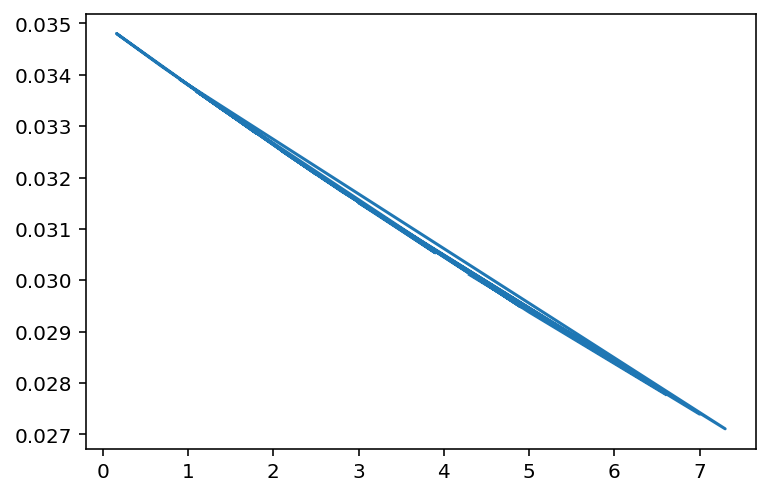

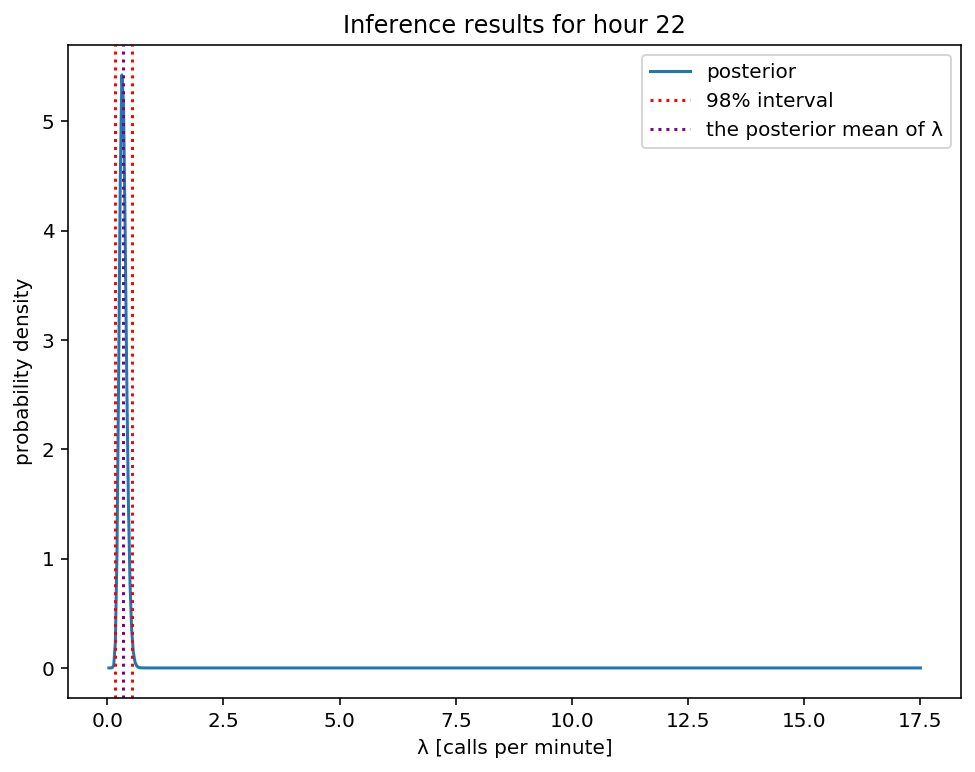

Posterior 98% interval: [0.17500000000000002, 0.525] calls per minute
Expected value: λ = 0.3409090908797441 calls per minute
[2.7, 4.4, 11.0, 3.4, 0.027, 0.87, 3.6, 13.0, 3.0, 2.5, 0.77, 0.84, 2.4, 3.2, 1.2, 4.6]


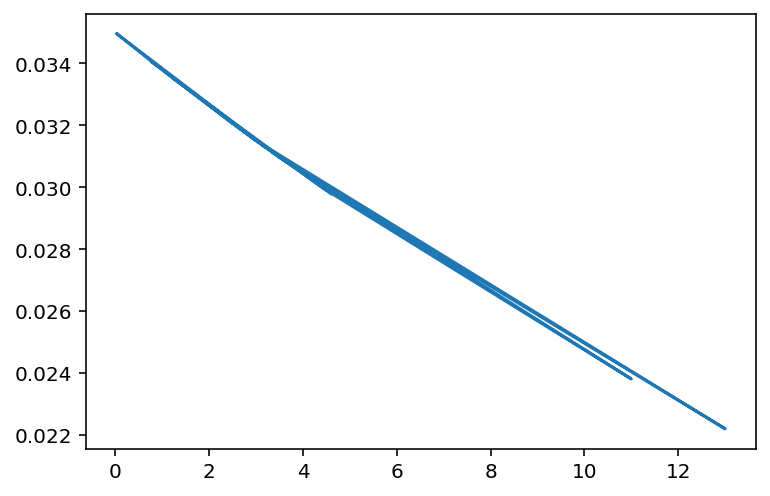

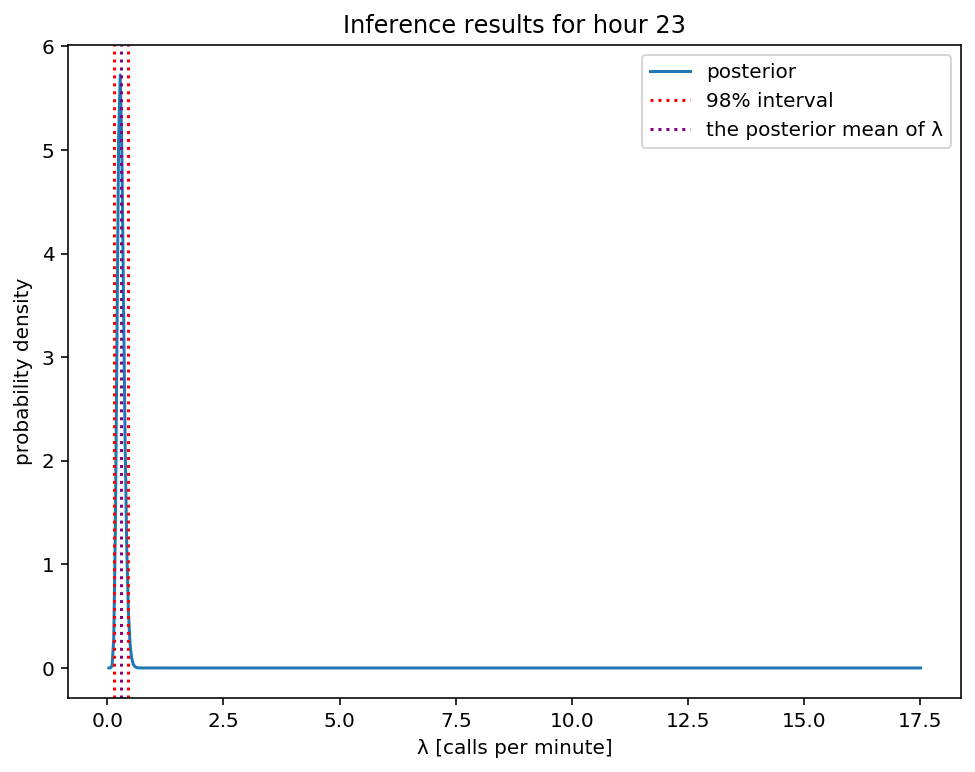

Posterior 98% interval: [0.14, 0.45500000000000007] calls per minute
Expected value: λ = 0.29433661798263644 calls per minute


In [83]:
#I create arrays to save the posterior confidence intervals and the posterior mean of lambda for each hour in the day

percentiles = []
posterior_means = []

#Setting the hour index back to 24
hour_index = range(24)

#I loop for each hour of the day

for i in hour_index:
    waiting_times_hour = waiting_times_per_hour[i]

    #A posterior distribution is computed for each hour
    posterior = compute_posterior(lambdas, prior, likelihood, waiting_times_hour)

    #For the given posterior mean of lambda is computed and added to an array
    lambda_ = sp.integrate.trapz(posterior * lambdas, lambdas)
    posterior_means.append(lambda_)
    
    #Also 98% confidence intervals are added to an array as well
    percentiles.append([compute_percentile(lambdas, posterior, p) for p in [0.01, 0.99]])
    
    #The confidence intervals and the mean is plotted along with the posterior distribution for each hour
    plt.figure(figsize=(8, 6))
    plt.plot(lambdas, posterior, label='posterior')
    plt.axvline(percentiles[i][0], color='red', linestyle=':', label='98% interval')
    plt.axvline(percentiles[i][1], color='red', linestyle=':')
    plt.axvline(lambda_, color='purple', linestyle=':', label='the posterior mean of λ')
    plt.xlabel('λ [calls per minute]')
    plt.ylabel('probability density')
    plt.title(f'Inference results for hour {i}')
    plt.legend()
    plt.show()

    print('Posterior 98% interval:', percentiles[i], 'calls per minute')
    print('Expected value: λ =', lambda_, 'calls per minute')

In [86]:
#Presentation of the findings for question 1.1
for i in range(24):
    print(f'At {i}:00, Posterior 98% interval:', percentiles[i], 'calls per minute; Expected value: λ =', posterior_means[i], 'calls per minute')

At 0:00, Posterior 98% interval: [0.035, 0.21000000000000002] calls per minute; Expected value: λ = 0.10109349450261348 calls per minute
At 1:00, Posterior 98% interval: [0.035, 0.17500000000000002] calls per minute; Expected value: λ = 0.08028981091204002 calls per minute
At 2:00, Posterior 98% interval: [0.035, 0.17500000000000002] calls per minute; Expected value: λ = 0.09389806738770683 calls per minute
At 3:00, Posterior 98% interval: [0.07, 0.45500000000000007] calls per minute; Expected value: λ = 0.24266012558656802 calls per minute
At 4:00, Posterior 98% interval: [0.24500000000000002, 0.665] calls per minute; Expected value: λ = 0.4423328964613473 calls per minute
At 5:00, Posterior 98% interval: [0.6300000000000001, 1.1900000000000002] calls per minute; Expected value: λ = 0.9033121445299432 calls per minute
At 6:00, Posterior 98% interval: [1.225, 1.995] calls per minute; Expected value: λ = 1.5911875564257962 calls per minute
At 7:00, Posterior 98% interval: [2.38000000000

<module 'matplotlib.pyplot' from '/ext/anaconda-2019.03/lib/python3.7/site-packages/matplotlib/pyplot.py'>

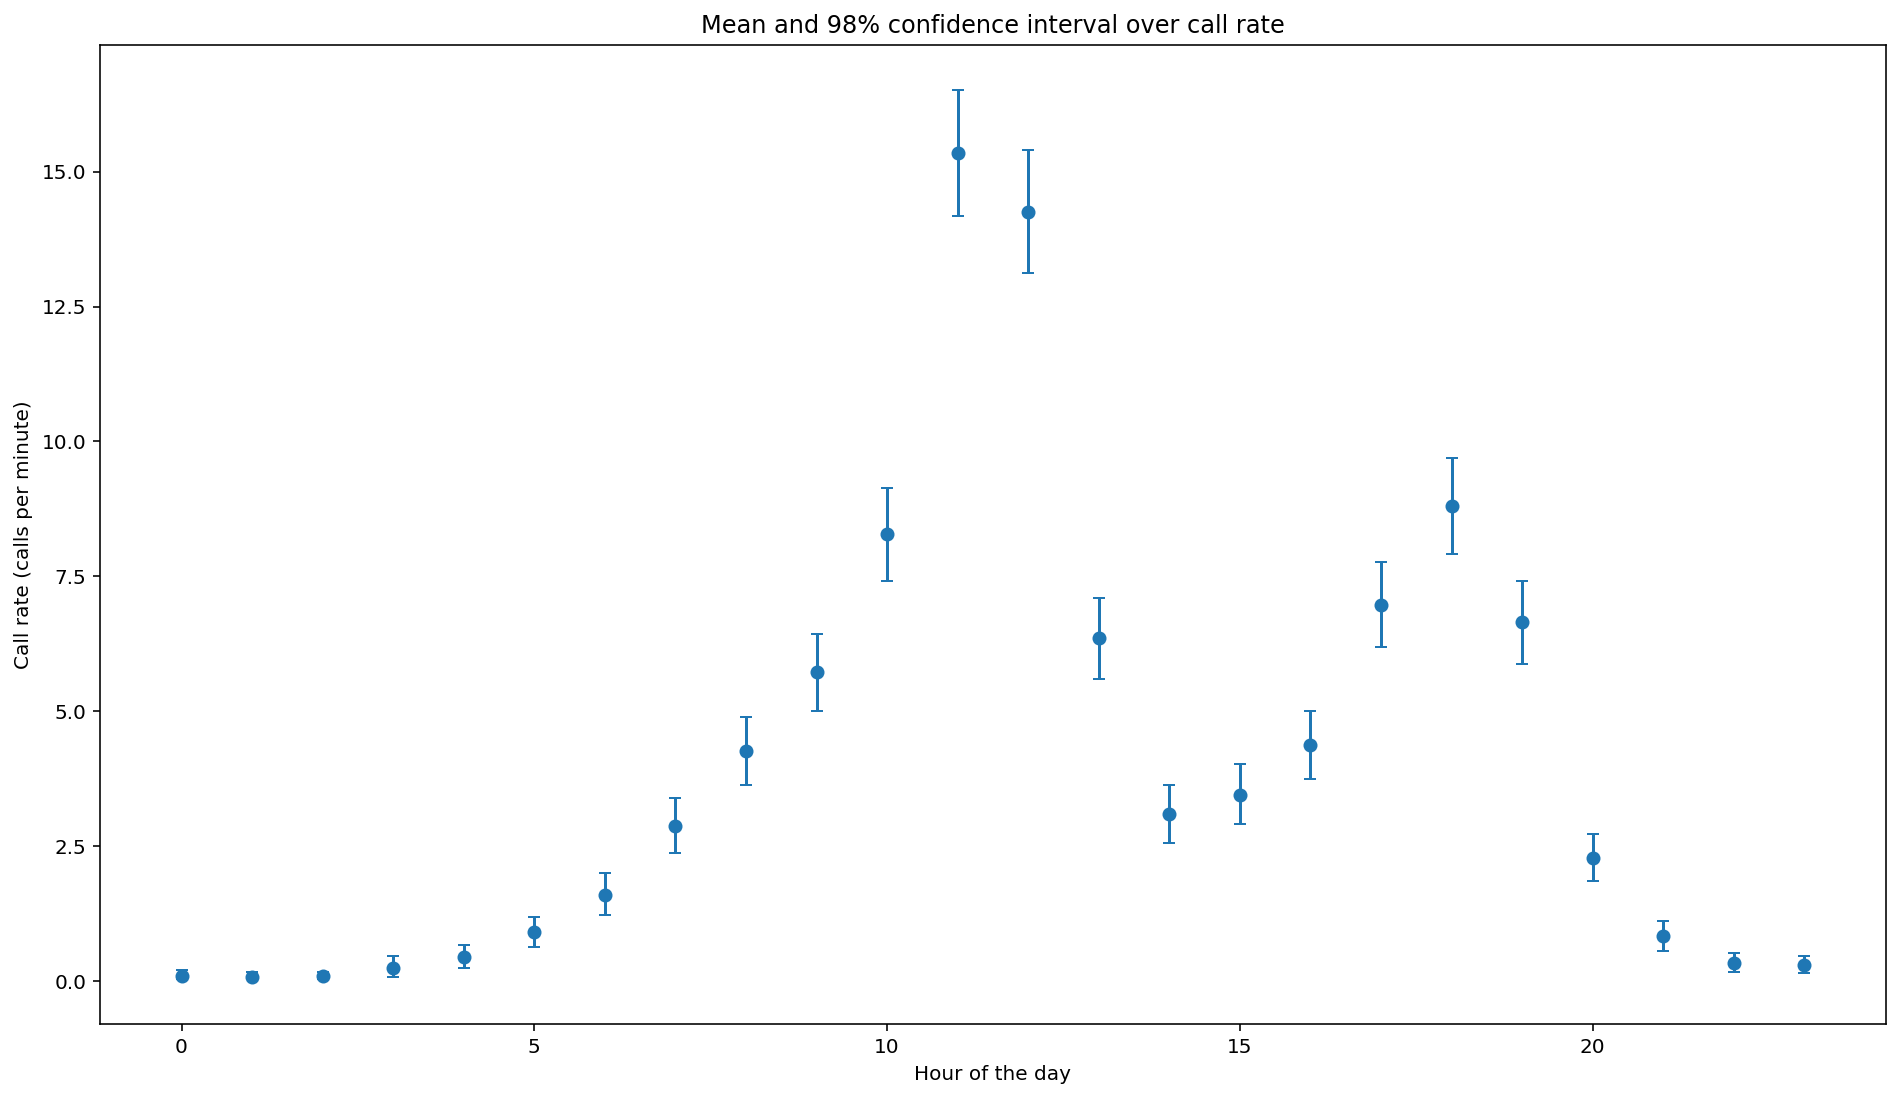

In [87]:
#1.2 Recreating the plot

#I create a 2d array so that I can visualize my confidence intervals with the errorbar() function
error_rates = [[],[]]

#I find the difference between each mean value and the confidence intervals
for i in range(0, len(posterior_means)):
    error_rates[0].append(posterior_means[i] - percentiles[i][0])
    error_rates[1].append(percentiles[i][1] - posterior_means[i])

#Creating the final plot
plt.figure(figsize=(16, 9))
plt.scatter(range(24), posterior_means)
plt.errorbar(range(24), posterior_means, yerr = error_rates, fmt='none', capsize=3)
plt.xlabel('Hour of the day')
plt.ylabel('Call rate (calls per minute)')
plt.title('Mean and 98% confidence interval over call rate')
plt

1.3.

In general, we predict two peaks in the number of calls your company will receive. One is around 11 am and 12 pm, and the other is around 6 pm. We expect to see the highest number of the calls during the peak at 11 am. On the other hand, we expect to see only a few calls around the night hours. Even though we cannot give 100% exact predictions, we provide you a range that we are 98% certain the average number of calls will fall within that range. For example, at 3 pm, we expect 3.4 calls per minute on average, but we are 98% certain the actual number will fall within 2.9 and 4. 

In retrospect with these predictions, we recommend your company to hire more employees during the shifts that contain the hours we identified to have more call traffic and hire fewer employees for the night shifts.